<a href="https://colab.research.google.com/github/HowardHNguyen/biostatistics/blob/main/Biostatistics_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The construction of diabetes dataset was explained. The data were collected from the Iraqi society, as they data were acquired from the laboratory of Medical City Hospital and (the Specializes Center for Endocrinology and Diabetes-Al-Kindy Teaching Hospital). Patients' files were taken and data extracted from them and entered in to the database to construct the diabetes dataset. The data consist of medical information, laboratory analysis. The data attribute are:

The dataset consists of data from healthy subjects (controls), diabetes subjects, and a third segment,
predicted diabetes subjects. Their biomedical data and laboratory analyses were collected and included
in the dataset.

The variables in the dataset are as follows:
- The Index number of the patient
- Gender
- AGE
- Creatinine ratio (Cr): This measures kidney function, with higher levels potentially indicating kidney problems.
- Body mass index (BMI)
- Urea: A waste product of protein metabolism, elevated levels may indicate kidney problems or dehydration.
- Cholesterol (Chol)
- Fasting lipid profile total, including LDL (short for low-density lipoprotein) and VLDL (short
for very low-density lipoprotein)
- Triglycerides (TG): A type of fat found in the blood, elevated levels can increase heart disease risk.
- HDL (short for high-density lipoprotein): Often referred to as "good" cholesterol, high levels can reduce heart disease risk.
- HbA1c (glycated hemoglobin): A measure of average blood sugar levels over several months, used to diagnose and monitor diabetes.

Ref: https://data.mendeley.com/datasets/wj9rwkp9c2/1


# Data Loading and EDA

In [82]:
#load the libraries needed
import pandas as pd
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [50]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/data/diabetes_1000.csv')

In [51]:
data.head()

,ID,No_Pation,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [52]:
#len() function to answer how many samples are in the dataset (rows)
len(data)

1000

In [53]:
data.isna().sum()

,0
ID,0
No_Pation,0
Gender,0
AGE,0
Urea,0
Cr,0
HbA1c,0
Chol,0
TG,0
HDL,0


In [54]:
# Remove the unwanted columns
df = data.drop(['ID', 'No_Pation'], axis=1)
df = df[df['CLASS'].str.contains("P") == False]

In [55]:
df.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


In [56]:
# List unique values in the CLASS column
unique_classes = df['CLASS'].unique()
print("Unique values in CLASS:", unique_classes)

# Count the number of unique types
num_types = df['CLASS'].nunique()
print("Number of unique types in CLASS:", num_types)

Unique values in CLASS: ['N' 'N ' 'Y' 'Y ']
Number of unique types in CLASS: 4


In [57]:
# Check if 'N ' exists in the CLASS column
if 'N ' in df['CLASS'].values:
    print("'N ' is present in the CLASS column.")
    # Replace 'N ' with 'N'
    df['CLASS'] = df['CLASS'].replace('N ', 'N')
else:
    print("'N ' is not present in the CLASS column.")

# Verify the unique values after replacement
print("Unique values in CLASS after replacement:", df['CLASS'].unique())

# Check if 'Y ' exists in the CLASS column
if 'Y ' in df['CLASS'].values:
    print("'Y ' is present in the CLASS column.")
    # Replace 'Y ' with 'Y'
    df['CLASS'] = df['CLASS'].replace('Y ', 'Y')
else:
    print("'Y ' is not present in the CLASS column.")

# Verify the unique values after replacement
print("Unique values in CLASS after replacement:", df['CLASS'].unique())

'N ' is present in the CLASS column.
Unique values in CLASS after replacement: ['N' 'Y' 'Y ']
'Y ' is present in the CLASS column.
Unique values in CLASS after replacement: ['N' 'Y']


The P class represents predicted diabetes cases, so these cases should also be removed. Why? Because
working with predicted and not real classes can cause bias, and only diagnostically confirmed cases
should be kept in the dataset.

To analyze these classes better, the dataset is grouped by gender and then described, as follows:

In [58]:
#Group by gender and transpose to have a better table
dtable1=df.groupby(['Gender']).describe()
dtable1=dtable1.transpose()

In [59]:
#Fix the problem with invalid class and repeat the grouping by Gender
df = df.replace('f','F', regex=True)
dtable1=df.groupby(['Gender']).describe()
dtable1=dtable1.transpose()

In [60]:
dtable1

Gender              F           M
AGE count  418.000000  529.000000
    mean    53.794258   54.344045
    std      8.749691    8.296972
    min     20.000000   26.000000
    25%     51.000000   52.000000
...               ...         ...
BMI min     20.000000   19.000000
    25%     26.000000   28.000000
    50%     29.000000   30.000000
    75%     33.000000   33.000000
    max     39.000000   47.750000

[80 rows x 2 columns]

In [61]:
#Group by class and see if there are any invalid classes in the CLASS
dtable2=df.groupby(['CLASS']).describe()
dtable2=dtable2.transpose()

In [62]:
dtable2

CLASS               N           Y
AGE count  103.000000  844.000000
    mean    44.233010   55.305687
    std      9.418592    7.548902
    min     25.000000   20.000000
    25%     38.500000   53.000000
...               ...         ...
BMI min     19.000000   19.000000
    25%     21.000000   28.000000
    50%     22.000000   30.000000
    75%     24.000000   33.000000
    max     24.600000   47.750000

[80 rows x 2 columns]

There are invalid spaces in the CLASS variable, which is the reason why it outputs four instead of two classes of Y and N. The next step is to fix this by removing the spaces (using the strip() function) around the Y and N letters, which will correct the invalid data in the CLASS variable.

In [63]:
#Fix the invalid spaces in the CLASS variable and repeat the grouping
df['CLASS']=df['CLASS'].str.strip()
dtable2=df.groupby(['CLASS']).describe()
dtable2=dtable2.transpose()
dtable2

CLASS               N           Y
AGE count  103.000000  844.000000
    mean    44.233010   55.305687
    std      9.418592    7.548902
    min     25.000000   20.000000
    25%     38.500000   53.000000
...               ...         ...
BMI min     19.000000   19.000000
    25%     21.000000   28.000000
    50%     22.000000   30.000000
    75%     24.000000   33.000000
    max     24.600000   47.750000

[80 rows x 2 columns]

The average BMI count is 22.37 for control subjects and 30.81 for diabetics. This is a big difference and shows that obesity is related to diabetes (both casually and as a risk factor), which is another fact referenced scientifically in the past. Further, the std metric is around three times larger for diabetes subjects, meaning increased variability of BMI for this group.

The average BMI count is 22.37 for control subjects and 30.81 for diabetics. This is a big difference and shows that obesity is related to diabetes (both casually and as a risk factor), which is another fact referenced scientifically in the past. Further, the std metric is around three times larger for diabetes subjects, meaning increased variability of BMI for this group.

In [64]:
table_final=df.groupby(['Gender','CLASS']).describe()
table_final=table_final.transpose()
table_final

Gender             F                      M            
CLASS              N           Y          N           Y
AGE count  64.000000  354.000000  39.000000  490.000000
    mean   43.984375   55.567797  44.641026   55.116327
    std     8.989398    7.444007  10.191553    7.625751
    min    25.000000   20.000000  26.000000   26.000000
    25%    38.750000   53.000000  39.000000   53.250000
...              ...         ...        ...         ...
BMI min    20.000000   20.000000  19.000000   19.000000
    25%    21.000000   27.000000  21.000000   28.000000
    50%    22.000000   30.000000  22.000000   30.000000
    75%    24.000000   33.000000  24.000000   33.000000
    max    24.500000   39.000000  24.600000   47.750000

[80 rows x 4 columns]

In the Diabetes dataset, we will be exploring the potential differences or similarities in the data distribution between diabetes and control subjects. We will explore their lipid profile (LDL, HDL, and TG) and HbA1c, a clinical measure used to show how much of the hemoglobin is glycated over a period of 3 months (a value that tells us the status of glucose over 3 months). Before creating the visualizations, to simplify the process, create a new object that contains four variables: TG, LDL, HDL, and HbA1c. This object will be used to create data visualizations easily. Here is how we can do it:

In [65]:
#Create an object containing only 4 variables to analyze
variables=['TG', 'LDL', 'HDL', 'HbA1c']

Text(0.5, 1.0, 'HbA1c distribution density by CLASS')

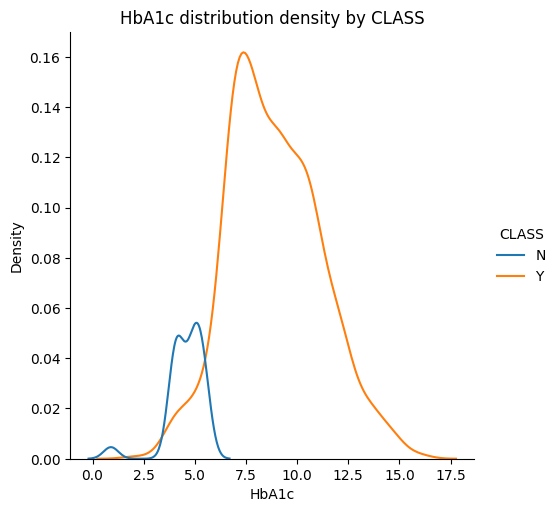

In [73]:
#Evaluate the distribution plot for HbA1c for Controls and Diabetics
sns.displot(data=df[variables],x="HbA1c", hue=df["CLASS"], kind="kde")
plot.title("HbA1c distribution density by CLASS")

One very important aspect to observe in the previous graph is the horizontal axis (x). The y-axis represents the KDE (short for Kernel Density Estimate), which is a method for estimating the density of observations. Here, it is defined by the frequency of observations on the y-axis, conditioned on the values of x. It can be seen that the HbA1c level is drastically increased in diabetes subjects and most of the distribution (density of observations) for them is above a level of 6. On the contrary, subjects with no diabetes have most of their HbA1c distribution below 6, and it can be observed that the distribution for controls is to the left compared to diabetes. The peak for the control group distribution is around 5, while the peak for diabetics is around 7.5. All of this can be easily explored visually and, as such, is an important part of exploratory data analysis (EDA).

Text(0.5, 1.0, 'TG distribution density by CLASS')

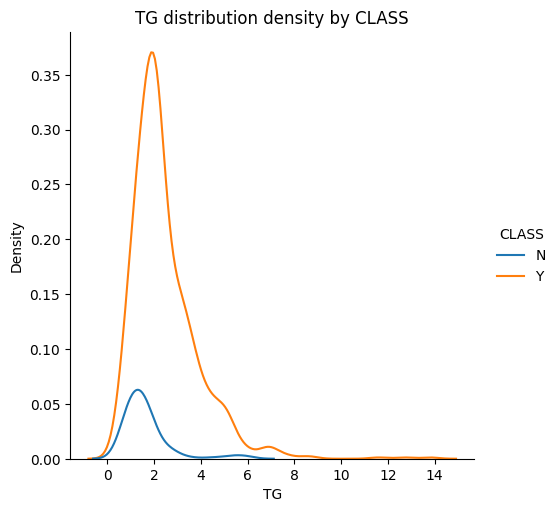

In [74]:
sns.displot(data=df[variables],x="TG", hue=df["CLASS"], kind="kde")
plot.title("TG distribution density by CLASS")

This time, the difference between the control group and diabetics is not as obvious as the peaks are similar, around 2 on the x axis (the TG value), but some differences can still be observed. The controls have very little distribution above 3, which is not the case for diabetics, so a slight increase in HbA1c can also be observed for triglycerides (TG) in diabetics.

Text(0.5, 1.0, 'LDL distribution density by CLASS')

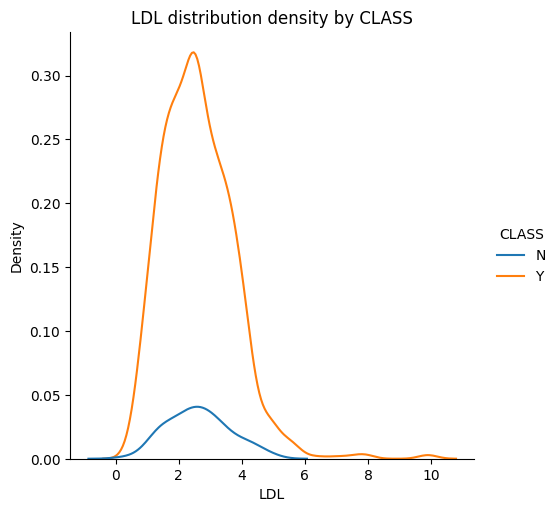

In [75]:
sns.displot(data=df[variables],x="LDL", hue=df["CLASS"], kind="kde")
plot.title("LDL distribution density by CLASS")

As for LDL, there is very little difference in terms of the density peak values of HbA1c, (the peaks are in a similar position). Even though the peak for diabetics is higher on the y axis, that is not relevant in terms of the differences and mean conditional values on LDL. There is lower variability of LDL in the data for diabetics, but still, the values are mostly a bit above 2, as is the situation with the control group.

The HDL parameter can be beneficial for health and is considered good cholesterol. The next step is to evaluate HDL between the control group and diabetics. Use the displot function to evaluate HDL:

Text(0.5, 1.0, 'HDL distribution density by CLASS')

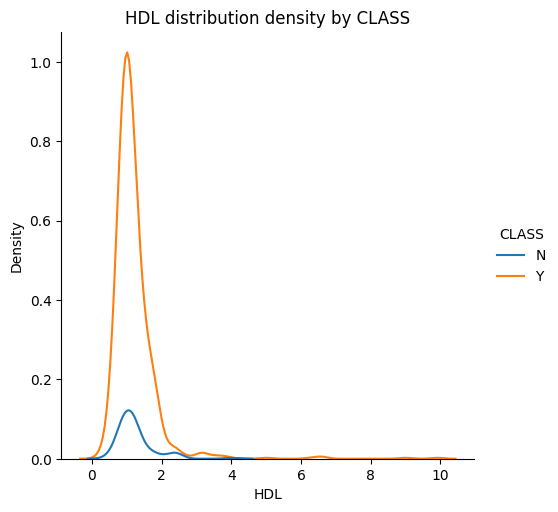

In [76]:
sns.displot(data=df[variables],x="HDL", hue=df["CLASS"], kind="kde")
plot.title("HDL distribution density by CLASS")

HDL peaks are also similar, as seen on the x axis; again, some difference may be present in the peak height, but still not enough to conclude the difference conditions on HDL. There is another way to evaluate potential differences in parameters by observing their distribution. Instead of using lines, stacked histograms can be used, by adding multiple="stack", which is the argument for the sns.distplot() function, and removing kind=kde.

Here is the code for the stacked histogram for HbA1c:

Text(0.5, 1.0, 'HbA1c distribution density by CLASS')

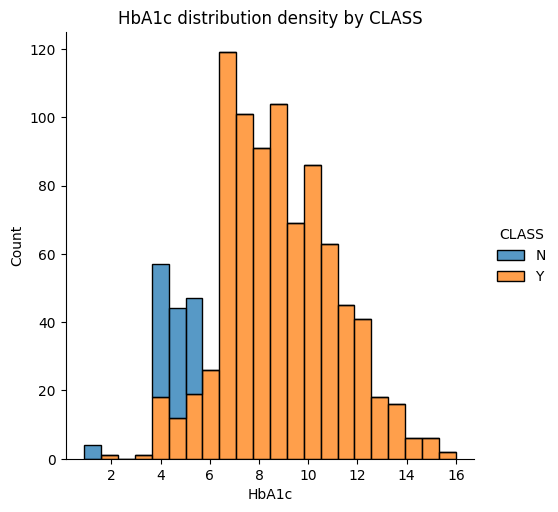

In [77]:
sns.displot(data=df[variables],x="HbA1c", hue=df["CLASS"], multiple="stack")
plot.title("HbA1c distribution density by CLASS")

The situation is similar to the previous exploration of HbA1c. Part of the distribution where the count is larger for controls is between 4 and 6 and below 2. On the other hand, dominant counts of HbA1c values are above 6 for diabetes subjects. HbA1c is known to be increased in diabetes subjects and this is confirmed through the EDA of this project.

Repeat the same procedure for LDL now:

Text(0.5, 1.0, 'LDL distribution density by CLASS')

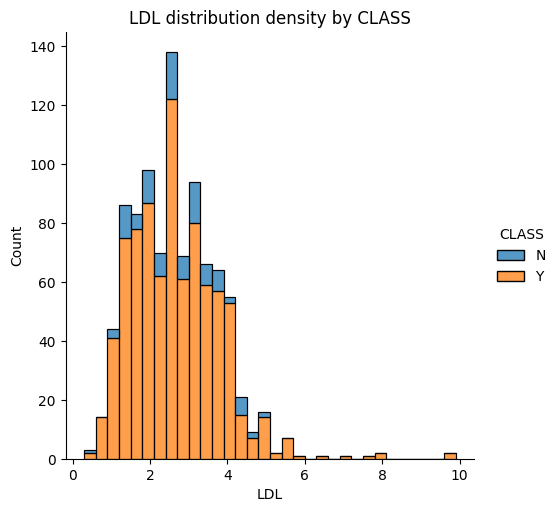

In [78]:
sns.displot(data=df[variables],x="LDL", hue=df["CLASS"], multiple="stack")
plot.title("LDL distribution density by CLASS")

As can be seen, the counts for the N and Y classes can now clearly be observed and the level of homogeneity between differences is notable. Logically, there is more of the dark color (blue if it’s an e-book) as there were more diabetes subjects at the beginning of the project, but the difference between N and Y classes is similar across the whole distribution with minor differences in the fact that only the Y class is present above the LDL threshold of 6.

To conclude, the distribution of LDL is similar across both controls and diabetics, with minor differences toward upper values of LDL. Notice how I combined the visual and textual explanations to explore LDL levels across controls and diabetes subjects.

Now, we will explore the TG levels across different subjects:

Text(0.5, 1.0, 'TG distribution density by CLASS')

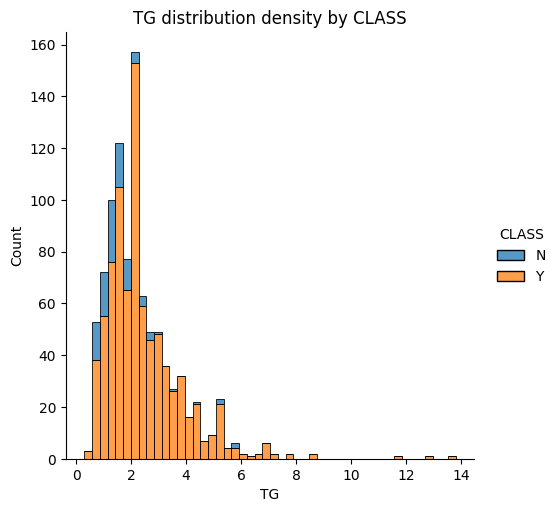

In [79]:
sns.displot(data=df[variables],x="TG", hue=df["CLASS"], multiple="stack")
plot.title("TG distribution density by CLASS")

The interpretation of this plot is slightly different. It can be seen that the control versus diabetes levels of TG are not the same across the whole plot. The differences increase as the level of TG increases, meaning TG could be another interesting parameter to further explore. Notice how, after a value of 4, there are almost no controls on the plot, while diabetes subjects are still present.

The next variable to explore is the last of the defined variables, which is HDL.

Exploring the HDL levels across different groups (N and Y classes)
Here, we are exploring the HDL level across the different groups as mentioned; a comparison is done between controls and diabetic subjects based on their HDL levels:

Text(0.5, 1.0, 'HDL distribution density by CLASS')

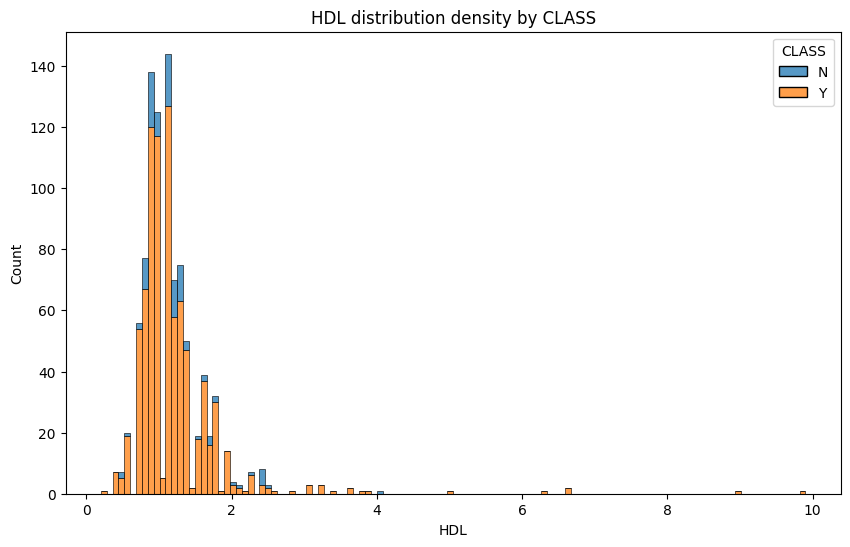

In [86]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df[variables],x="HDL", hue=df["CLASS"], multiple="stack", ax=ax)
plt.title("HDL distribution density by CLASS")

For the HDL parameter, no major differences in the distributions of values can be seen across the x axis.

To summarize the distribution visual analysis, visual distribution-based EDA has shown that the largest differences between controls and diabetes subjects were identified for the HbA1c parameter. As expected, diabetes subjects had much increased glycated hemoglobin. Another different pattern was noted for triglycerides. LDL and HDL were explored and similar distributions were found in both controls and diabetics.

### Another type of visualization – Seaborn scatter plot
To have an even more detailed angle on observing each data point individually and also how data points of different classes group together, we can use a scatter plot:

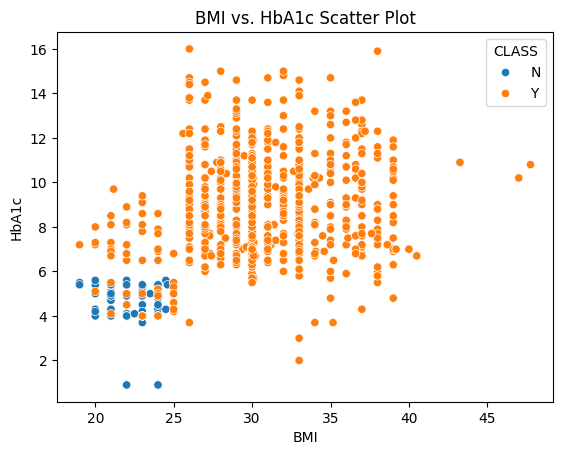

In [89]:
# perform bivariate visual EDA using seaborn scatterplot
sns.scatterplot(data=df, x='BMI', y='HbA1c', hue='CLASS')
plt.title('BMI vs. HbA1c Scatter Plot')
plt.show()

A scatter plot includes every data point for different groups plotted based on at least two variables. For this project, the BMI and HbA1c variables are used. Both the x and y axes can be used for interpretation. If the x axis is observed, it can be seen that BMI values for controls (dark dots, or blue dots for the e-book) generally have lower values compared to the majority of points for diabetes subjects (orange dots). A similar observation can be seen for HbA1c; as noted before, it is increased for diabetes subjects. Now, we can observe all the points and compare them using two variables (BMI and HbA1c) simultaneously.

The scatter plot can now be complemented with the distribution plots discussed in the previous visualization and this can make a formidable graph to explore the data.

A scatter plot can show the grouping of all individual data points, and adding the distribution plot we learned about before can show how the data is distributed with lines.

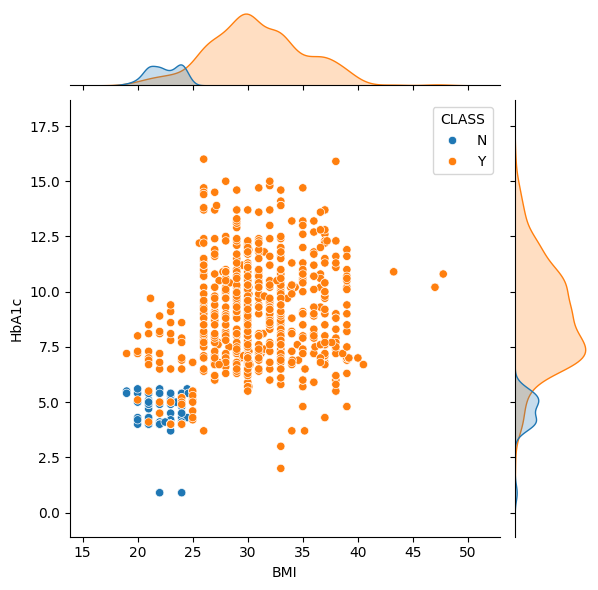

In [91]:
# make the joint plot visualization and separate scatter points by class
sns.jointplot(data=df, x='BMI', y='HbA1c', hue='CLASS', kind='scatter')
#plt.title('BMI vs. HbA1c Scatter Plot')
plt.show()

Now, all that was mentioned previously about BMI and HbA1c can be seen easily: higher BMI and HbA1c values for diabetes subjects.

### Data visualization using boxplots
Since HbA1c was the parameter that was identified as important in relation to differences between controls and diabetes subjects, it can be explored further by using the boxplot visualization. Furthermore, the data can be separated based on gender too, so an additional angle of exploration can be added.

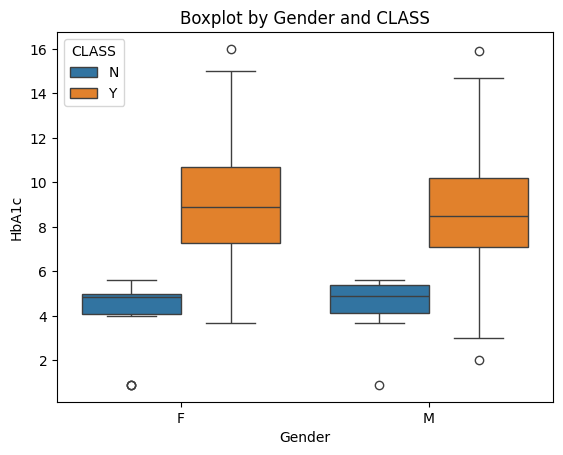

In [93]:
# create the boxplot HbA1c vs CLASS
sns.boxplot(data=df, x='Gender', y='HbA1c', hue='CLASS')
plt.title('Boxplot by Gender and CLASS')
plt.show()

As seen in the plot, the median (central lines of the boxplots), as well as upper and lower ends of the boxes (75% and 25% of the data) are all increased in diabetics compared to controls, which is another confirmation of the previous HbA1c data explorations (boxplots for diabetes subjects are on the right side of F and M on the plot).

## Grouping and Aggregation: Mean Glucose by Outcome
Grouping the data by outcome helps compare averages across diabetic and non-diabetic groups.

In [71]:
# Group by outcome and calculate mean glucose
mean_glucose_by_outcome = df.groupby('CLASS')['Chol'].mean()
print(mean_glucose_by_outcome)

CLASS
N    4.268932
Y    4.953104
Name: Chol, dtype: float64


In [ ]:
# Group by gender and transpose to have a better table view
dtable1 = data.groupby('Gender').describe()
dtable1 = dtable1.T
dtable1

Gender              F           M
ID  count  435.000000  565.000000
    mean   335.551724  344.309735
    std    244.904400  237.017052
    min      3.000000    1.000000
    25%    120.500000  131.000000
...               ...         ...
BMI min     19.000000   19.000000
    25%     25.000000   27.000000
    50%     29.000000   30.000000
    75%     33.000000   33.000000
    max     39.000000   47.750000

[96 rows x 2 columns]

In [ ]:
data.columns

Index(['ID', 'No_Pation', 'Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG',
       'HDL', 'LDL', 'VLDL', 'BMI', 'CLASS'],
      dtype='object')

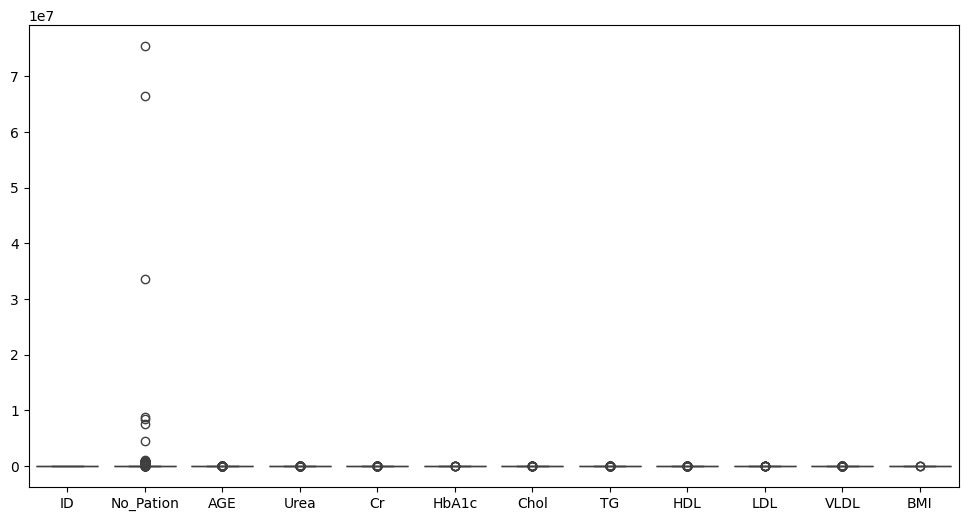

In [ ]:
plt.figure(figsize=(12, 6), facecolor='w')
sns.boxplot(data=data)
#sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
#plt.title('Correlation Matrix')
plt.show()

In [ ]:
data['CLASS'].value_counts()

,count
CLASS,
Y,844
N,103
P,53


In [ ]:
# Assign model feature and target column to variables
X = data['HDL']
Y = data['LDL']

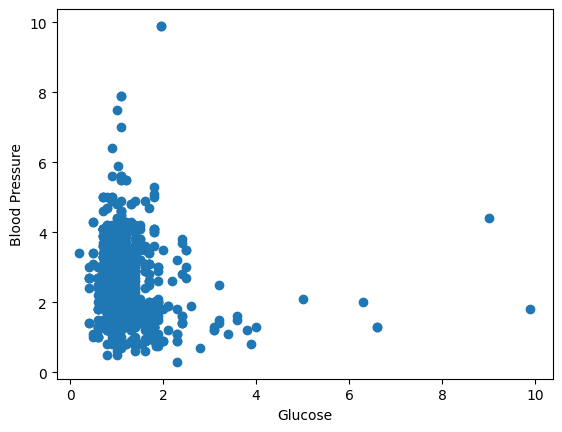

In [ ]:
# Visualize a scatter plot

import matplotlib.pyplot as plt

plt.scatter(X, Y)
plt.xlabel('Glucose')
plt.ylabel('Blood Pressure')
plt.show()

In [ ]:
!pip install scipy
!pip install statsmodels
!pip install scikit-learn

In [ ]:
from scipy import stats
# sample data
data1 = [1, 2, 3, 4]
data2 = [5, 6, 7, 8]
# perform t-test
t_statistic, p_value = stats.ttest_ind(data1, data2)
# print results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: -4.381780460041329
p-value: 0.004659214943993936


We can see two main outputs: t-statistic and p-value. The t-statistic is the main output of the t-test, but since it’s difficult to interpret directly, it is used to calculate the p-value and use it for the main interpretation of the result. The p-value is 0.004, which is less than the threshold mentioned previously of p=0.05. This means we can accept Na (the alternate hypothesis) and say there is a statistically significant difference between these two sets of numbers. More accurately, there is a statistically significant difference between the means of these two sets of numbers. If the situation was different and the p-value was >0.05, we could say that N0 (the null hypothesis) was accepted and a statistical significance was not found between these two numbers.

Now, what if we have counts and we cannot present them using means? Then, we can use a Chi-squared test. This time, we have a null hypothesis that there is no significant difference between observed and expected counts. Let’s start:

In [ ]:
from scipy.stats import chisquare
# sample data
observed = [10, 20]
expected = [15, 15]
# perform chi-squared test
chi2_statistic, p_value = chisquare(observed, f_exp=expected)
# print results
print(f"chi2-statistic: {chi2_statistic}")
print(f"p-value: {p_value}")

chi2-statistic: 3.3333333333333335
p-value: 0.06788915486182893


The p-value is 0.067, which is larger than 0.05, and we accept the null hypothesis, meaning we didn’t find a significant difference.

Artificial data (simulated example) was used for the example here, but in real datasets, the situation can be more complex and the data more diverse.

Now, let’s try this code on the real diabetes dataset we downloaded in the previous chapter:

In [ ]:
#Load libraries
import pandas as pd
from scipy import stats
#Load the diabetes dataset - loaded
#Select subjects with confirmed diabetes
data=data[data['CLASS']=='Y']

The second step is to define groups for comparison. In this case, we are comparing female and male diabetics based on their high-density lipoprotein (HDL) levels. Let’s define those groups in the code:

In [ ]:
#Define the separate datasets for Females-F and Males-M
data1 = data[data['Gender']=='F']
data2 = data[data['Gender']=='M']
#Select the high density lipoprotein (HDL)
HDLf=data1['HDL']
HDLm=data2['HDL']
import matplotlib.pyplot as plt

Next, we can define HDLf and HDLm labels for female and male values of HDL:

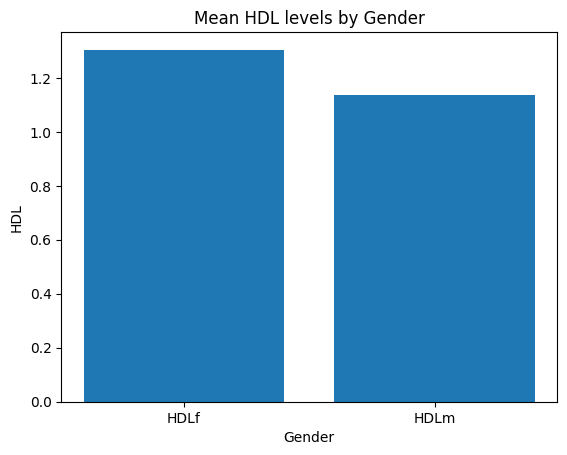

In [ ]:
# Create a list of labels for the x-axis
labels = ['HDLf', 'HDLm']
# Create a list of heights for the bars
heights = [HDLf.mean(), HDLm.mean()]
# Create a bar plot
plt.bar(labels, heights)
# Add labels and title
plt.xlabel('Gender')
plt.ylabel('HDL')
plt.title('Mean HDL levels by Gender')
# Display the plot
plt.show()

To perform the t-test, we can use the ttest_ind() function, which is a t-test for independent samples. Why do we use it in this case? Well, because males and females are independent of each other, they can be considered as different, independent samples:

In [ ]:
# perform t-test
t_statistic, p_value = stats.ttest_ind(HDLf, HDLm)
# print results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: 3.5105258243462885
p-value: 0.00047097313336391374


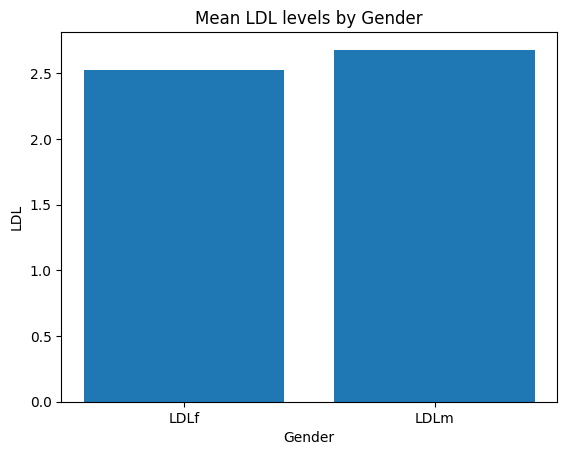

In [ ]:
#Select the low-density lipoprotein (LDL)
LDLf=data1['LDL']
LDLm=data2['LDL']
# Create a list of labels for the x-axis
labels = ['LDLf', 'LDLm']
# Create a list of heights for the bars
heights = [LDLf.mean(), LDLm.mean()]
# Create a bar plot
plt.bar(labels, heights)
# Add labels and title
plt.xlabel('Gender')
plt.ylabel('LDL')
plt.title('Mean LDL levels by Gender')
# Display the plot
plt.show()

In [ ]:
# perform t-test
t_statistic, p_value = stats.ttest_ind(LDLf, LDLm)
# print results
print(f"t-statistic: {t_statistic}")
print(f"p-value: {p_value}")

t-statistic: -1.9185718058393002
p-value: 0.05537639997889902


### Train a Model
We will reshape the data into the desired input format for KNN() model, build a KNN model, and fit it with the target feature. Then, the KNN model is ready to make prediction for outliers.

In [ ]:
Y = Y.values.reshape(-1, 1)
X = X.values.reshape(-1, 1)
clf = KNN()
clf.fit(Y)
outliers = clf.predict(Y)

### Identify Outliers
The outliers variable contains values for prediction indicating 1 is an outlier and 0 is not an outlier. Let's find the position of identified outliers.

In [ ]:
anomaly = np.where(outliers==1)

# List of identified outliers
anomaly

(array([  8,  13,  20,  31,  43,  52,  53,  54,  56,  73,  99, 111, 132,
        144, 153, 162, 182, 186, 199, 206, 220, 228, 231, 247, 248, 254,
        258, 286, 287, 296, 297, 323, 335, 359, 364, 370, 388, 392, 409,
        412, 415, 458, 485, 486, 487, 540, 545, 555, 574, 584, 606, 645,
        655, 673, 679, 695, 707, 710, 713, 715, 753]),)

In [ ]:
# Preview identified outliers
data.iloc[anomaly].head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
20,3,126,88,41,235,39.3,0.704,27,0
31,3,158,76,36,245,31.6,0.851,28,1
43,9,171,110,24,240,45.4,0.721,54,1
52,5,88,66,21,23,24.4,0.342,30,0
53,8,176,90,34,300,33.7,0.467,58,1
54,7,150,66,42,342,34.7,0.718,42,0
56,7,187,68,39,304,37.7,0.254,41,1
73,4,129,86,20,270,35.1,0.231,23,0


### Visualize Outlier Distribution

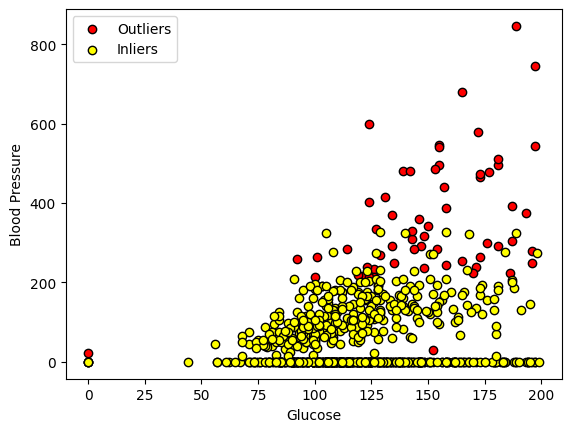

In [ ]:
# Visualize outlier distribution

Y_outliers = Y[np.where(outliers==1)]
X_outliers = X[np.where(outliers==1)]
Y_inliers = Y[np.where(outliers==0)]
X_inliers = X[np.where(outliers==0)]

plt.scatter(X_outliers, Y_outliers, edgecolor='black',color='red', label= 'Outliers')
plt.scatter(X_inliers, Y_inliers, edgecolor='black',color='yellow', label= 'Inliers')
plt.legend()
plt.ylabel('Blood Pressure')
plt.xlabel('Glucose')
plt.show()

### Calculate Anomaly Scores
PyOD predicts anomaly score for the outliers using the trained model. The larger the anomaly score, the higher probability the instance is an outlier.

In [ ]:
# Calculate anomaly scores
anomaly_score = clf.decision_function(Y)

Visualize outlier distribution using a histogram. The red vertical line indicates the minimum anomaly score to flag an instance as an outlier.

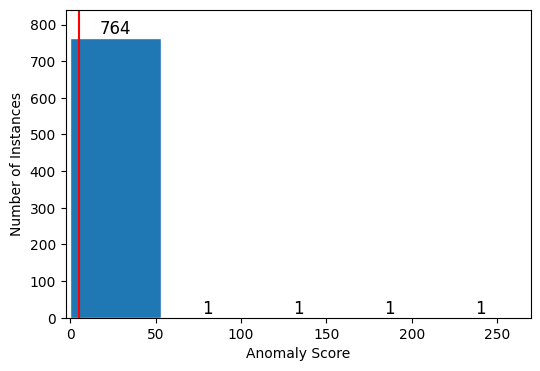

In [ ]:
n_bins = 5

min_outlier_anomaly_score = np.floor(np.min(anomaly_score[np.where(outliers==1)])*10)/10

plt.figure(figsize=(6, 4))
values, bins, bars = plt.hist(anomaly_score, bins=n_bins, edgecolor='white')
plt.axvline(min_outlier_anomaly_score, c='r')
plt.bar_label(bars, fontsize=12)
plt.margins(x=0.01, y=0.1)
plt.xlabel('Anomaly Score')
plt.ylabel('Number of Instances')
plt.show()

### Change Anomaly Threshold
You can manually define a threshold for anomaly score.

In [ ]:
# Set a higher threshold of anomaly score

raw_outliers = np.where(anomaly_score >= 250)
raw_outliers

(array([13]),)

In [ ]:
# View the identified outlier

data.iloc[raw_outliers].head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
13,1,189,60,23,846,30.1,0.398,59,1


Visualize the distribution with a modified anomaly score threshold.

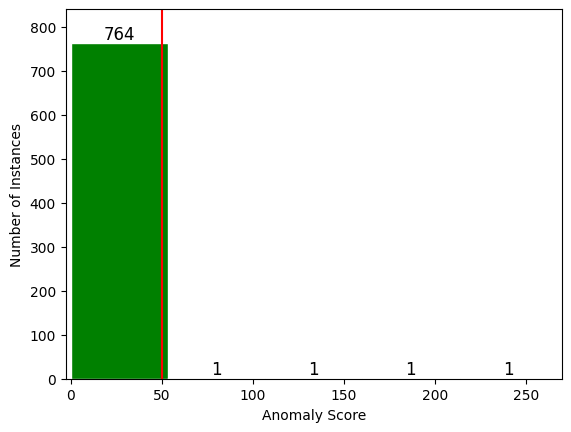

In [ ]:
n_bins = 5

min_anomaly_score = 50

values, bins, bars = plt.hist(anomaly_score, bins=n_bins, edgecolor='white', color='green')
plt.axvline(min_anomaly_score, c='r')
plt.bar_label(bars, fontsize=12)
plt.margins(x=0.01, y=0.1)
plt.xlabel('Anomaly Score')
plt.ylabel('Number of Instances')
plt.show()

### Anomaly Detection by Isolation Forest

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset from local or Databricks File System
file_path = "/content/drive/MyDrive/data/diabetes-pima-indians.csv"  # Update path if needed
columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
df = pd.read_csv(file_path, names=columns, header=None)  # Ensure no header row is read as data

In [ ]:
# Convert all columns to numeric types to avoid errors
df = df.apply(pd.to_numeric, errors='coerce')

In [ ]:
# Drop the Outcome column as we are doing unsupervised anomaly detection
df_features = df.drop(columns=["Outcome"])

In [ ]:
# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_features)

In [ ]:
# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df["Anomaly"] = iso_forest.fit_predict(df_scaled)

In [ ]:
# Count detected anomalies
anomalies = df[df["Anomaly"] == -1]

In [ ]:
print("Detected Anomalies in Diabetes Dataset:")
display(anomalies)

Detected Anomalies in Diabetes Dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Anomaly
5,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0,-1
8,10.0,115.0,0.0,0.0,0.0,35.3,0.134,29.0,0.0,-1
9,2.0,197.0,70.0,45.0,543.0,30.5,0.158,53.0,1.0,-1
14,1.0,189.0,60.0,23.0,846.0,30.1,0.398,59.0,1.0,-1
40,4.0,111.0,72.0,47.0,207.0,37.1,1.390,56.0,1.0,-1
44,9.0,171.0,110.0,24.0,240.0,45.4,0.721,54.0,1.0,-1
50,7.0,105.0,0.0,0.0,0.0,0.0,0.305,24.0,0.0,-1
61,2.0,84.0,0.0,0.0,0.0,0.0,0.304,21.0,0.0,-1
82,2.0,74.0,0.0,0.0,0.0,0.0,0.102,22.0,0.0,-1
160,17.0,163.0,72.0,41.0,114.0,40.9,0.817,47.0,1.0,-1


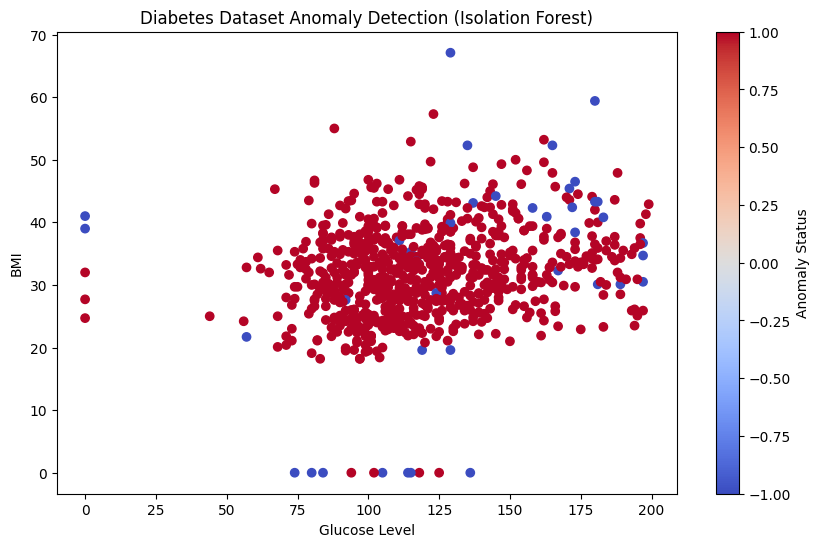

In [ ]:
# ✅ Plot the anomalies in the Glucose vs. BMI space
plt.figure(figsize=(10, 6))
plt.scatter(df["Glucose"], df["BMI"], c=df["Anomaly"], cmap="coolwarm")
plt.xlabel("Glucose Level")
plt.ylabel("BMI")
plt.title("Diabetes Dataset Anomaly Detection (Isolation Forest)")
plt.colorbar(label="Anomaly Status")
plt.show()

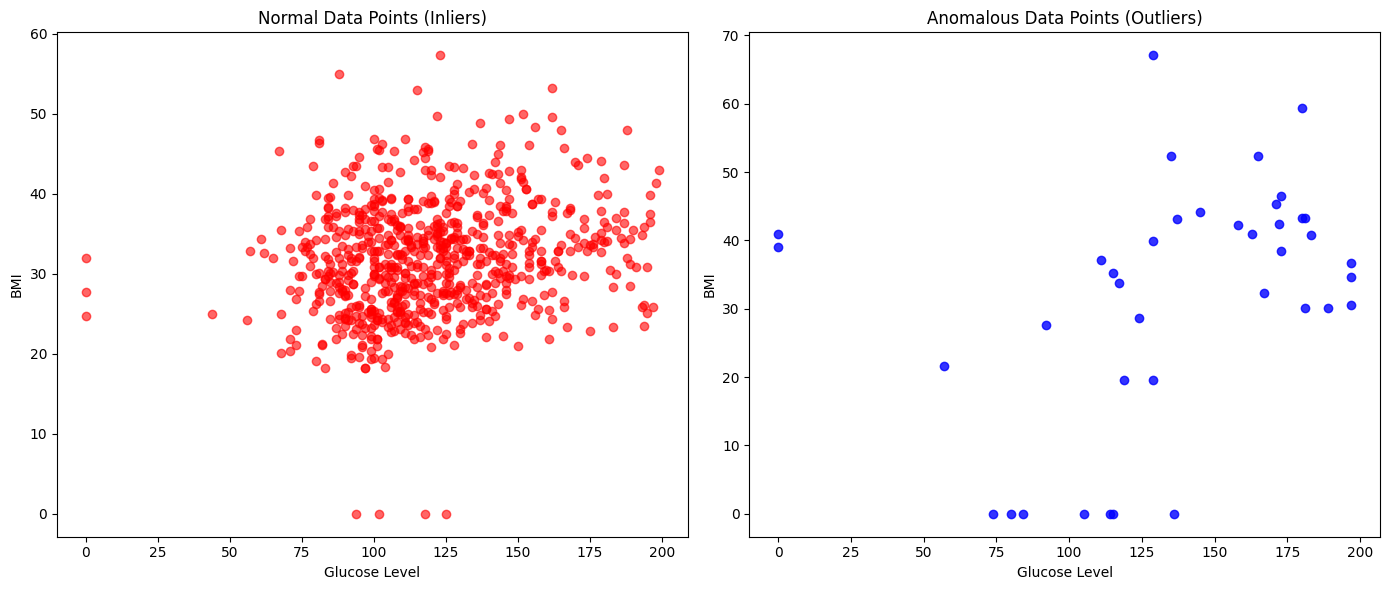

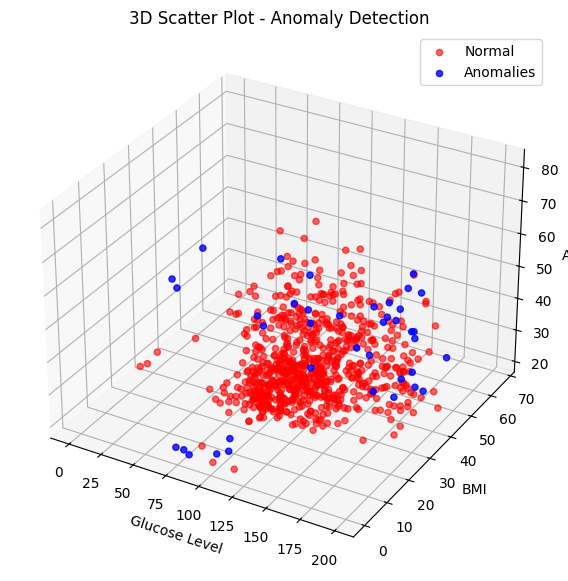

In [ ]:
# Separate inliers and outliers
df_inliers = df[df["Anomaly"] == 1]
df_outliers = df[df["Anomaly"] == -1]

# Create side-by-side scatter plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot inliers (normal points)
axes[0].scatter(df_inliers["Glucose"], df_inliers["BMI"], color="red", alpha=0.6, label="Normal")
axes[0].set_title("Normal Data Points (Inliers)")
axes[0].set_xlabel("Glucose Level")
axes[0].set_ylabel("BMI")

# Plot outliers (anomalies)
axes[1].scatter(df_outliers["Glucose"], df_outliers["BMI"], color="blue", alpha=0.8, label="Anomalies")
axes[1].set_title("Anomalous Data Points (Outliers)")
axes[1].set_xlabel("Glucose Level")
axes[1].set_ylabel("BMI")

# Show plots
plt.tight_layout()
plt.show()

# 3D Scatter Plot (Glucose, BMI, Age)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_inliers["Glucose"], df_inliers["BMI"], df_inliers["Age"], color="red", alpha=0.6, label="Normal")
ax.scatter(df_outliers["Glucose"], df_outliers["BMI"], df_outliers["Age"], color="blue", alpha=0.8, label="Anomalies")

ax.set_xlabel("Glucose Level")
ax.set_ylabel("BMI")
ax.set_zlabel("Age")
ax.set_title("3D Scatter Plot - Anomaly Detection")
ax.legend()

plt.show()

In [ ]:
import plotly.express as px
# Create 3D scatter plot using Plotly for interactive visualization
fig = px.scatter_3d(df, x="Glucose", y="BMI", z="Age",
                     color=df["Anomaly"].map({1: "Normal", -1: "Anomaly"}),
                     title="3D Interactive Scatter Plot - Anomaly Detection",
                     labels={"Glucose": "Glucose Level", "BMI": "BMI", "Age": "Age"},
                     opacity=0.5)

# Show interactive plot
fig.show()

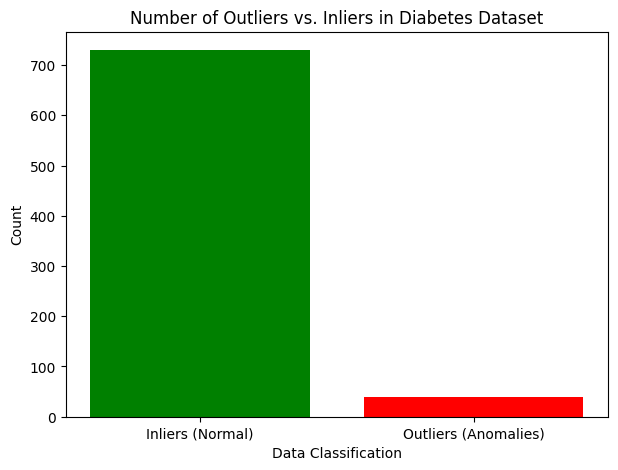

In [ ]:
import matplotlib.pyplot as plt

# Count inliers and outliers
num_inliers = (df["Anomaly"] == 1).sum()
num_outliers = (df["Anomaly"] == -1).sum()

# Plot bar chart
plt.figure(figsize=(7, 5))
plt.bar(["Inliers (Normal)", "Outliers (Anomalies)"], [num_inliers, num_outliers], color=["green", "red"])
plt.xlabel("Data Classification")
plt.ylabel("Count")
plt.title("Number of Outliers vs. Inliers in Diabetes Dataset")
plt.show()

In [ ]:
anomalies.shape

(39, 10)

In [ ]:
df.shape

(769, 10)

In [ ]:
#grouped = pd.DataFrame(grouped)

# Further Analysis with MLs and DLs

**Multivariate Analysis:**
 - We can use logistic regression to evaluate the combined impact of various factors on Outcome status.

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Anomaly'],
      dtype='object')

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

ROC AUC: 0.81


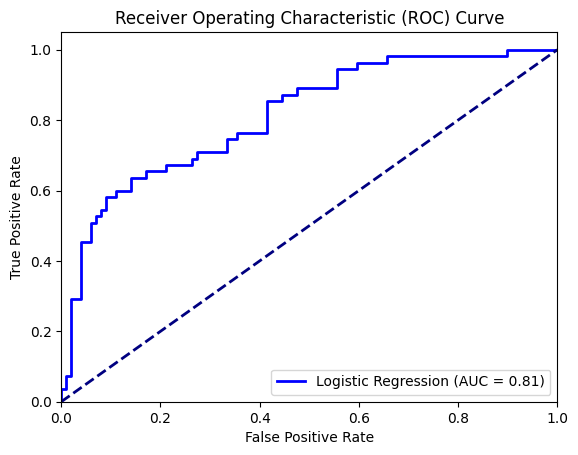

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prepare the data for logistic regression
# Add relevant variables as needed
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
          'DiabetesPedigreeFunction','Age']]
y = data['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

### Implementation of Advanced Resampling Techniques and Model Tuning:
**Random Forest model with 6 feature importances**

Using SMOTE:

              precision    recall  f1-score   support

           0       0.87      0.78      0.82        99
           1       0.80      0.88      0.84       101

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

ROC AUC: 0.89


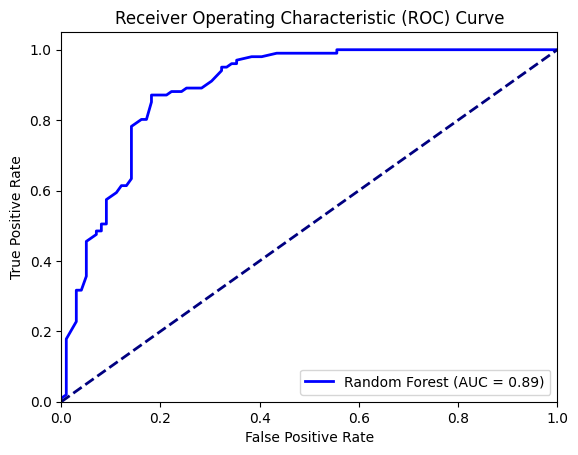

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Define a parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best model from grid search
best_rf = grid_search.best_estimator_

# Predict on the test set
y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

# Evaluate the model
print(classification_report(y_test, y_pred))
roc_auc = roc_auc_score(y_test, y_proba)
print(f'ROC AUC: {roc_auc:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

The Random Forest model has significantly improved performance compared to the logistic regression model. The AUC has increased to 0.87, indicating a much better ability to distinguish between the positive and negative classes. Additionally, the precision, recall, and F1-score metrics have improved for both classes.

**Summary of Metrics:**

1. Precision, Recall, and F1-Score:
- Class 0 (Negative):
   - Precision: 0.87
   - Recall: 0.78
   - F1-Score: 0.82
- Class 1 (Positive):
  - Precision: 0.80
  - Recall: 0.88
  - F1-Score: 0.84
2. Overall Accuracy:
- The overall accuracy is 0.83, which is a good improvement and indicates balanced performance across both classes.
3. ROC AUC:
- The ROC AUC of 0.89 suggests that the model has a high discriminative power and is effective at distinguishing between the two classes.

**Analysis and Interpretation:**
- Balanced Performance: The Random Forest model shows balanced performance across both classes, with similar precision, recall, and F1-scores for both the negative and positive classes. This indicates that the model is well-calibrated and performs well in identifying both diabetes cases and non-cases.
- Improved Recall for Positive Class: The recall for the positive class (diabetes cases) has significantly improved to 0.83, meaning the model is correctly identifying 83% of the actual diabetes cases.

**Feature Important Analysis:**

Analyze the feature importance from the Random Forest model to understand which features contribute most to the prediction of diabetes. This can provide insights into key factors influencing people health.

                    Feature  Importance
1                   Glucose    0.246969
5                       BMI    0.189336
7                       Age    0.149874
6  DiabetesPedigreeFunction    0.125098
2             BloodPressure    0.084102
4                   Insulin    0.070162
3             SkinThickness    0.067910
0               Pregnancies    0.066550


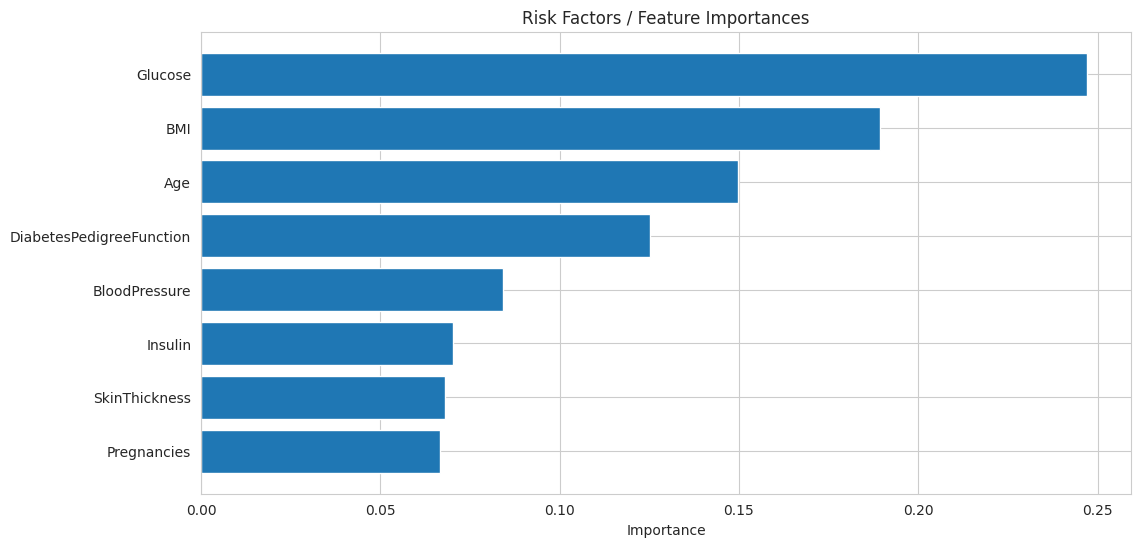

In [ ]:
import pandas as pd

# Get feature importances from the Random Forest model
feature_importances = best_rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importance_df)

# Plot the feature importances
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Risk Factors / Feature Importances')
plt.show()


# Implement Machine Learning, Deep Learning, and Advanced Combined models
1. Traditional ML Models:
 - Logistic Regression (LR)
 - Support Vector Machine (SVM)
2. Advanced Ensemble ML Models:
 - Random Forest (RF)
 - Gradient Boosting Machine (GBM)
3. Deep Learning Models:
 - Simple Neural Network (NN)
 - Convolutional Neural Network (CNN)
4. Advanced Combined Models:
 - Gated Recurrent Unit with Attention (GRU+Attention)
 - Convolutional Neural Network with GRU (CNN+GRU)

### Implementation Plan:
1. Prepare Data:
 - Load and preprocess the data.
 - Apply SMOTE to handle class imbalance.
2. Model Implementation and Evaluation:
 - Implement each model.
 - Tune hyperparameters using GridSearchCV or appropriate tuning techniques.
 - Evaluate model performance using metrics like accuracy, precision, recall, F1-score, and ROC AUC.
3. Comparison and Analysis:
 - Compare the performance of all models.
 - Identify the best-performing model.

## Traditional Machine Learning models

### Prepare the data
with more attributes added to prediction

In [ ]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
# data = pd.read_csv('...')

# Define features and target
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
          'DiabetesPedigreeFunction','Age']]
y = data['Outcome']


# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Logistic Regression
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = log_reg.predict(X_test)
y_proba_lr = log_reg.predict_proba(X_test)[:, 1]

# Evaluation
print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)
print(f'ROC AUC: {roc_auc_lr:.2f}')

Logistic Regression
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        99
           1       0.75      0.77      0.76       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200

ROC AUC: 0.84


### Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

# Support Vector Machine
svm = SVC(probability=True)
svm.fit(X_train, y_train)

# Predictions
y_pred_svm = svm.predict(X_test)
y_proba_svm = svm.predict_proba(X_test)[:, 1]

# Evaluation
print("Support Vector Machine")
print(classification_report(y_test, y_pred_svm))
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)
print(f'ROC AUC: {roc_auc_svm:.2f}')

Support Vector Machine
              precision    recall  f1-score   support

           0       0.78      0.70      0.73        99
           1       0.73      0.80      0.76       101

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200

ROC AUC: 0.82


## Advanced Ensemble ML Models

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f'ROC AUC: {roc_auc_rf:.2f}')

Random Forest
              precision    recall  f1-score   support

           0       0.87      0.77      0.82        99
           1       0.80      0.89      0.84       101

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.83      0.83      0.83       200

ROC AUC: 0.89


### Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Gradient Boosting Machine
gbm = GradientBoostingClassifier(random_state=42)
gbm.fit(X_train, y_train)

# Predictions
y_pred_gbm = gbm.predict(X_test)
y_proba_gbm = gbm.predict_proba(X_test)[:, 1]

# Evaluation
print("Gradient Boosting Machine")
print(classification_report(y_test, y_pred_gbm))
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)
print(f'ROC AUC: {roc_auc_gbm:.2f}')

Gradient Boosting Machine
              precision    recall  f1-score   support

           0       0.81      0.75      0.78        99
           1       0.77      0.83      0.80       101

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200

ROC AUC: 0.86


## Deep Learning models

### Simple Neural Network

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Simple Neural Network
model_nn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_nn = model_nn.predict(X_test).ravel()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

# Evaluation
print("Simple Neural Network")
print(classification_report(y_test, y_pred_nn))
roc_auc_nn = roc_auc_score(y_test, y_proba_nn)
print(f'ROC AUC: {roc_auc_nn:.2f}')

Epoch 1/50
20/20 [==============================] - 1s 10ms/step - loss: 0.6588 - accuracy: 0.6062 - val_loss: 0.6081 - val_accuracy: 0.7375
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5821 - accuracy: 0.7391 - val_loss: 0.5453 - val_accuracy: 0.7563
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5353 - accuracy: 0.7469 - val_loss: 0.5114 - val_accuracy: 0.7375
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5072 - accuracy: 0.7563 - val_loss: 0.4904 - val_accuracy: 0.7437
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4884 - accuracy: 0.7609 - val_loss: 0.4780 - val_accuracy: 0.7437
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4764 - accuracy: 0.7734 - val_loss: 0.4751 - val_accuracy: 0.7500
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4678 - accuracy: 0.7797 - val_loss: 0.4687 - val_accuracy: 0.7500
Epoch 8/50
20/20 [=

### Convolutional Neural Network (CNN)

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convolutional Neural Network
model_cnn = Sequential([
    Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_cnn = model_cnn.predict(X_test_cnn).ravel()
y_pred_cnn = (y_proba_cnn > 0.5).astype(int)

# Evaluation
print("Convolutional Neural Network")
print(classification_report(y_test, y_pred_cnn))
roc_auc_cnn = roc_auc_score(y_test, y_proba_cnn)
print(f'ROC AUC: {roc_auc_cnn:.2f}')

Epoch 1/50
20/20 [==============================] - 1s 11ms/step - loss: 0.6524 - accuracy: 0.6375 - val_loss: 0.5894 - val_accuracy: 0.7437
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5789 - accuracy: 0.7328 - val_loss: 0.5375 - val_accuracy: 0.7375
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5414 - accuracy: 0.7437 - val_loss: 0.5138 - val_accuracy: 0.7312
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5231 - accuracy: 0.7328 - val_loss: 0.5045 - val_accuracy: 0.7188
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5151 - accuracy: 0.7437 - val_loss: 0.4977 - val_accuracy: 0.7312
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5095 - accuracy: 0.7375 - val_loss: 0.4992 - val_accuracy: 0.7375
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5070 - accuracy: 0.7359 - val_loss: 0.4979 - val_accuracy: 0.7312
Epoch 8/50
20/20 [=

## Advanced Comined Models

### GRU with Attention

In [ ]:
from tensorflow.keras.layers import GRU, Attention

# GRU with Attention
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1], 1))
gru_layer = GRU(64, return_sequences=True)(input_layer)
attention_layer = Attention()([gru_layer, gru_layer])
flatten_layer = Flatten()(attention_layer)
output_layer = Dense(1, activation='sigmoid')(flatten_layer)

model_gru_attention = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_gru_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_gru_attention.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_gru_attention = model_gru_attention.predict(X_test_cnn).ravel()
y_pred_gru_attention = (y_proba_gru_attention > 0.5).astype(int)

# Evaluation
print("GRU with Attention")
print(classification_report(y_test, y_pred_gru_attention))
roc_auc_gru_attention = roc_auc_score(y_test, y_proba_gru_attention)
print(f'ROC AUC: {roc_auc_gru_attention:.2f}')

Epoch 1/50
20/20 [==============================] - 2s 23ms/step - loss: 0.6695 - accuracy: 0.5813 - val_loss: 0.6108 - val_accuracy: 0.7000
Epoch 2/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6183 - accuracy: 0.6906 - val_loss: 0.5782 - val_accuracy: 0.6938
Epoch 3/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6151 - accuracy: 0.6844 - val_loss: 0.5814 - val_accuracy: 0.6938
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6126 - accuracy: 0.6906 - val_loss: 0.5778 - val_accuracy: 0.6875
Epoch 5/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6089 - accuracy: 0.6891 - val_loss: 0.5746 - val_accuracy: 0.6875
Epoch 6/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6072 - accuracy: 0.6844 - val_loss: 0.5721 - val_accuracy: 0.6812
Epoch 7/50
20/20 [==============================] - 0s 6ms/step - loss: 0.6024 - accuracy: 0.6906 - val_loss: 0.5684 - val_accuracy: 0.6875
Epoch 8/50
20/20 [=

### CNN with GRU

In [ ]:
# CNN with GRU
cnn_layer = Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1))(input_layer)
pooling_layer = MaxPooling1D(pool_size=2)(cnn_layer)
gru_layer = GRU(64)(pooling_layer)
output_layer = Dense(1, activation='sigmoid')(gru_layer)

model_cnn_gru = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)

model_cnn_gru.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_cnn_gru.fit(X_train_cnn, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Predictions
y_proba_cnn_gru = model_cnn_gru.predict(X_test_cnn).ravel()
y_pred_cnn_gru = (y_proba_cnn_gru > 0.5).astype(int)

# Evaluation
print("CNN with GRU")
print(classification_report(y_test, y_pred_cnn_gru))
roc_auc_cnn_gru = roc_auc_score(y_test, y_proba_cnn_gru)
print(f'ROC AUC: {roc_auc_cnn_gru:.2f}')

Epoch 1/50
20/20 [==============================] - 2s 22ms/step - loss: 0.6785 - accuracy: 0.5688 - val_loss: 0.6297 - val_accuracy: 0.6875
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6317 - accuracy: 0.6547 - val_loss: 0.5902 - val_accuracy: 0.6812
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.6136 - accuracy: 0.6750 - val_loss: 0.5777 - val_accuracy: 0.6938
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5986 - accuracy: 0.6953 - val_loss: 0.5616 - val_accuracy: 0.7063
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5762 - accuracy: 0.7000 - val_loss: 0.5483 - val_accuracy: 0.7000
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5513 - accuracy: 0.7281 - val_loss: 0.5203 - val_accuracy: 0.7250
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.5260 - accuracy: 0.7453 - val_loss: 0.5133 - val_accuracy: 0.7500
Epoch 8/50
20/20 [=

## Comparison and Analysis

In [ ]:
# Summarize all ROC AUC scores
roc_auc_scores = {
    'Logistic Regression': roc_auc_lr,
    'Support Vector Machine': roc_auc_svm,
    'Random Forest': roc_auc_rf,
    'Gradient Boosting Machine': roc_auc_gbm,
    'Simple Neural Network': roc_auc_nn,
    'Convolutional Neural Network': roc_auc_cnn,
    'GRU with Attention': roc_auc_gru_attention,
    'CNN with GRU': roc_auc_cnn_gru
}

# Print all ROC AUC scores
for model, score in roc_auc_scores.items():
    print(f'{model}: ROC AUC = {score:.2f}')

Logistic Regression: ROC AUC = 0.84
Support Vector Machine: ROC AUC = 0.82
Random Forest: ROC AUC = 0.89
Gradient Boosting Machine: ROC AUC = 0.86
Simple Neural Network: ROC AUC = 0.83
Convolutional Neural Network: ROC AUC = 0.84
GRU with Attention: ROC AUC = 0.82
CNN with GRU: ROC AUC = 0.83


### Key Observations:
- The Random Forest model significantly outperforms the other models with a ROC AUC of 0.89.
- Ensemble methods like Random Forest and Gradient Boosting Machine generally perform well, but Random Forest has a clear edge in this case.
- Deep learning models (Simple Neural Network, CNN, GRU with Attention, CNN with GRU) show reasonable performance but do not surpass the Random Forest model.
- Traditional ML models (Logistic Regression, SVM) have lower ROC AUC scores compared to ensemble methods and deep learning models.

Random Forest Feature Importances
                    Feature  Importance
1                   Glucose    0.246969
5                       BMI    0.189336
7                       Age    0.149874
6  DiabetesPedigreeFunction    0.125098
2             BloodPressure    0.084102
4                   Insulin    0.070162
3             SkinThickness    0.067910
0               Pregnancies    0.066550


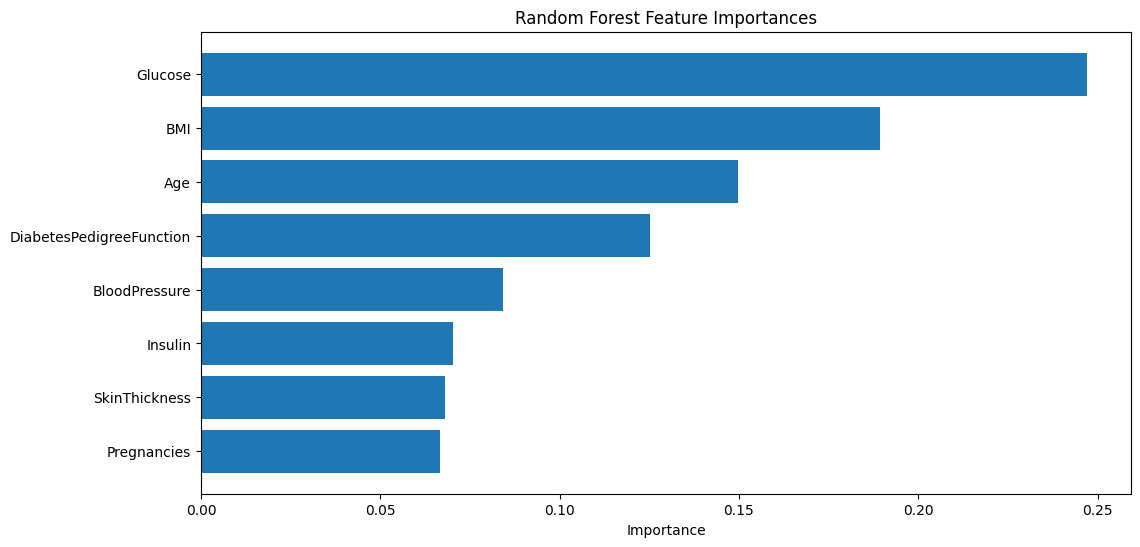

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances from the improved Random Forest model
feature_importances_rf = rf.feature_importances_

# Create a DataFrame for feature importances
features = X.columns
importance_df_rf = pd.DataFrame({'Feature': features, 'Importance': feature_importances_rf})

# Sort the DataFrame by importance
importance_df_rf = importance_df_rf.sort_values(by='Importance', ascending=False)

# Print the feature importances
print("Random Forest Feature Importances")
print(importance_df_rf)

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.barh(importance_df_rf['Feature'], importance_df_rf['Importance'])
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Random Forest Feature Importances')
plt.show()

## Stacking Ensemble Model Implementation
Combination with RF + GBM + SVM

Stacking Ensemble
              precision    recall  f1-score   support

           0       0.87      0.76      0.81        99
           1       0.79      0.89      0.84       101

    accuracy                           0.82       200
   macro avg       0.83      0.82      0.82       200
weighted avg       0.83      0.82      0.82       200

ROC AUC: 0.89


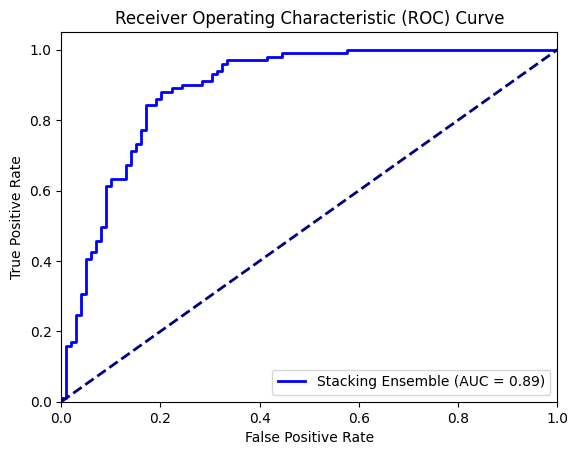

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Define the base models
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('gbm', GradientBoostingClassifier(random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# Define the meta-learner model
meta_model = LogisticRegression()

# Create the stacking ensemble
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train the stacking ensemble
stacking_clf.fit(X_train, y_train)

# Evaluate the stacking ensemble
y_pred_stack = stacking_clf.predict(X_test)
y_proba_stack = stacking_clf.predict_proba(X_test)[:, 1]

# Print evaluation metrics
print("Stacking Ensemble")
print(classification_report(y_test, y_pred_stack))
roc_auc_stack = roc_auc_score(y_test, y_proba_stack)
print(f'ROC AUC: {roc_auc_stack:.2f}')

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba_stack)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Stacking Ensemble (AUC = {roc_auc_stack:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_stack)

# Print confusion matrix
print("Confusion Matrix")
print(cm)


Confusion Matrix
[[75 24]
 [11 90]]


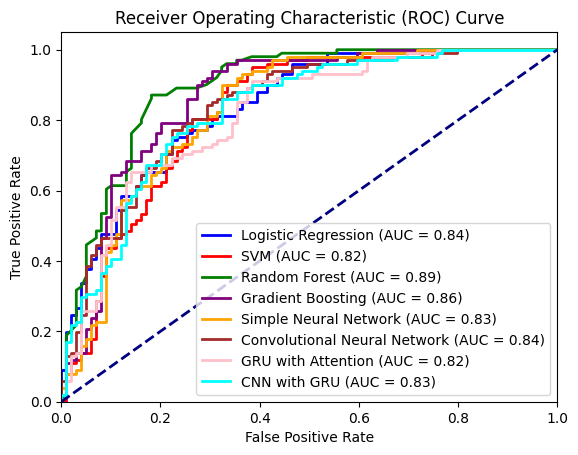

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate ROC curve and AUC for each updated model
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
roc_auc_svm = roc_auc_score(y_test, y_proba_svm)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

fpr_gbm, tpr_gbm, _ = roc_curve(y_test, y_proba_gbm)
roc_auc_gbm = roc_auc_score(y_test, y_proba_gbm)

fpr_nn, tpr_nn, _ = roc_curve(y_test, y_proba_nn)
roc_auc_nn = roc_auc_score(y_test, y_proba_nn)

fpr_cnn, tpr_cnn, _ = roc_curve(y_test, y_proba_cnn)
roc_auc_cnn = roc_auc_score(y_test, y_proba_cnn)

fpr_gru_attention, tpr_gru_attention, _ = roc_curve(y_test, y_proba_gru_attention)
roc_auc_gru_attention = roc_auc_score(y_test, y_proba_gru_attention)

fpr_cnn_gru, tpr_cnn_gru, _ = roc_curve(y_test, y_proba_cnn_gru)
roc_auc_cnn_gru = roc_auc_score(y_test, y_proba_cnn_gru)

# Plot all ROC curves on the same plot
plt.figure()

plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='red', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_gbm, tpr_gbm, color='purple', lw=2, label=f'Gradient Boosting (AUC = {roc_auc_gbm:.2f})')
plt.plot(fpr_nn, tpr_nn, color='orange', lw=2, label=f'Simple Neural Network (AUC = {roc_auc_nn:.2f})')
plt.plot(fpr_cnn, tpr_cnn, color='brown', lw=2, label=f'Convolutional Neural Network (AUC = {roc_auc_cnn:.2f})')
plt.plot(fpr_gru_attention, tpr_gru_attention, color='pink', lw=2, label=f'GRU with Attention (AUC = {roc_auc_gru_attention:.2f})')
plt.plot(fpr_cnn_gru, tpr_cnn_gru, color='cyan', lw=2, label=f'CNN with GRU (AUC = {roc_auc_cnn_gru:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### Analysis:
1. Random Forest: With an AUC of 0.89, the Random Forest model continues to outperform the other models, further solidifying its status as the best single model for this dataset.
2. Gradient Boosting Machine: The ROC AUC has increased to 0.86, indicating even stronger predictive performance.
3. Deep Learning Models: Significant improvements are observed in the deep learning models, particularly the CNN with GRU, which now has an AUC of 0.83.
4. Traditional Machine Learning Models: Logistic Regression and SVM have also improved substantially, with ROC AUCs of 0.84 and 0.82, respectively.

### Recommendations:
1. Model Deployment: Continue with the Random Forest and the stacking ensemble model for deployment, as they provide the best performance.
2. Feature Engineering: The addition of new features has proven beneficial. Consider exploring additional relevant features if available.
3. Continuous Improvement: Regularly update the model with new data and re-evaluate to ensure sustained performance.

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score

# Assuming y_pred_* are the predicted labels for each model

# Calculate accuracy for each model
accuracy_lr = accuracy_score(y_test, y_pred_lr) * 100
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
accuracy_rf = accuracy_score(y_test, y_pred_rf) * 100
accuracy_gbm = accuracy_score(y_test, y_pred_gbm) * 100
accuracy_nn = accuracy_score(y_test, y_pred_nn) * 100
accuracy_cnn = accuracy_score(y_test, y_pred_cnn) * 100
accuracy_gru_attention = accuracy_score(y_test, y_pred_gru_attention) * 100
accuracy_cnn_gru = accuracy_score(y_test, y_pred_cnn_gru) * 100

# Create a DataFrame to hold the results
results = {
    'Model': [
        'Logistic Regression',
        'Support Vector Machine',
        'Random Forest',
        'Gradient Boosting Machine',
        'Simple Neural Network',
        'Convolutional Neural Network',
        'GRU with Attention',
        'CNN with GRU'
    ],
    'Accuracy (%)': [
        accuracy_lr,
        accuracy_svm,
        accuracy_rf,
        accuracy_gbm,
        accuracy_nn,
        accuracy_cnn,
        accuracy_gru_attention,
        accuracy_cnn_gru
    ],
    'ROC AUC': [
        roc_auc_lr,
        roc_auc_svm,
        roc_auc_rf,
        roc_auc_gbm,
        roc_auc_nn,
        roc_auc_cnn,
        roc_auc_gru_attention,
        roc_auc_cnn_gru
    ]
}

results_df = pd.DataFrame(results)

# Display the results
print(results_df)

                          Model  Accuracy (%)   ROC AUC
0           Logistic Regression          75.5  0.839184
1        Support Vector Machine          75.0  0.824182
2                 Random Forest          83.0  0.892939
3     Gradient Boosting Machine          79.0  0.864386
4         Simple Neural Network          75.5  0.831283
5  Convolutional Neural Network          77.5  0.838584
6            GRU with Attention          72.0  0.816782
7                  CNN with GRU          76.0  0.827483


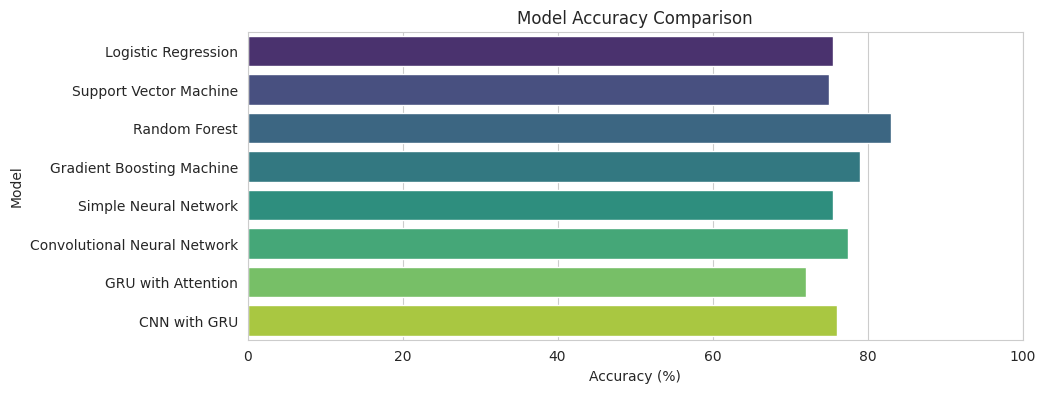

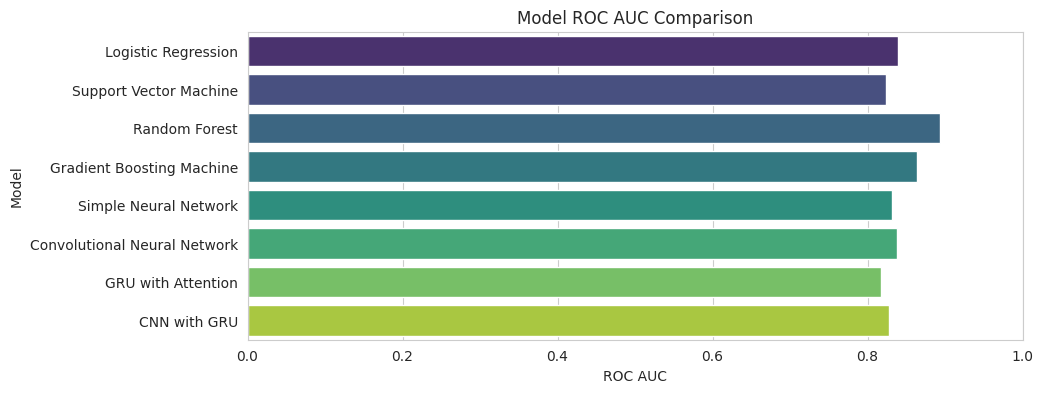

In [ ]:
# Plot the accuracy percentages
plt.figure(figsize=(10, 4), facecolor='white')
sns.set_style('whitegrid')
sns.barplot(x='Accuracy (%)', y='Model', data=results_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')
plt.xlim(0, 100)
plt.show()

# Plot the ROC AUC scores
plt.figure(figsize=(10, 4), facecolor='white')
sns.set_style('whitegrid')
sns.barplot(x='ROC AUC', y='Model', data=results_df, palette='viridis')
plt.title('Model ROC AUC Comparison')
plt.xlabel('ROC AUC')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

# Cross-Validation all 8 models

## Validating Logistic Regression, SVM, Random Forest, and Gradient Boosting Machine

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

# Define the models
lr_model = LogisticRegression()
svm_model = SVC(probability=True)
rf_model = RandomForestClassifier()
gbm_model = GradientBoostingClassifier()

# Perform 5-fold cross-validation for each model
cv_scores_lr = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_svm = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_gbm = cross_val_score(gbm_model, X_train, y_train, cv=5, scoring='roc_auc')

# Print the mean cross-validation scores
print(f'Logistic Regression CV AUC: {cv_scores_lr.mean():.2f}')
print(f'SVM CV AUC: {cv_scores_svm.mean():.2f}')
print(f'Random Forest CV AUC: {cv_scores_rf.mean():.2f}')
print(f'Gradient Boosting CV AUC: {cv_scores_gbm.mean():.2f}')


Logistic Regression CV AUC: 0.84
SVM CV AUC: 0.87
Random Forest CV AUC: 0.89
Gradient Boosting CV AUC: 0.87


## Validating Simple Neural Network, CNN, GRU with Attention, and CNN with GRU Separately
For the neural network models, let's validate them in another section.

### Simple Neural Network Cross-Validation

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold

class SimpleNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=10, batch_size=32):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"epochs": self.epochs, "batch_size": self.batch_size}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Ensure no NaN values
assert not np.any(np.isnan(X_train)), "X_train contains NaN values"
assert not np.any(np.isnan(y_train)), "y_train contains NaN values"

# Convert DataFrame to numpy array if necessary
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Instantiate the model
nn_model = SimpleNNClassifier(epochs=10, batch_size=32)

# Perform 5-fold cross-validation manually to debug
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []

for train_index, test_index in kf.split(X_train, y_train):
    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    nn_model.fit(X_train_cv, y_train_cv)
    y_pred_proba = nn_model.predict_proba(X_test_cv)

    # Check for NaN values in predictions
    if np.any(np.isnan(y_pred_proba)):
        print("NaN values found in predictions")
        continue

    roc_auc = roc_auc_score(y_test_cv, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    print(f"Fold ROC AUC: {roc_auc}")

# Calculate mean ROC AUC
mean_roc_auc = np.mean(roc_auc_scores)
print(f'Simple Neural Network CV AUC: {mean_roc_auc:.2f}')


Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6427 - accuracy: 0.6938
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5671 - accuracy: 0.7422
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5184 - accuracy: 0.7625
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: 0.4885 - accuracy: 0.7703
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7812
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4581 - accuracy: 0.7859
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4475 - accuracy: 0.7859
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.7812
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7922
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Fold ROC AUC: 0.8062197218315361
Epoch 1/10
20/20 [====

### CNN Cross-Validation

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import StratifiedKFold
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.preprocessing import StandardScaler

# Ensure data is properly reshaped for Conv1D
# Here, we ensure there are enough timesteps for the Conv1D layer
timesteps = 10
features = X_train.shape[1]
X_train_reshaped = np.repeat(X_train[:, np.newaxis, :], timesteps, axis=1)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped.reshape(-1, features)).reshape(X_train_reshaped.shape)

class KerasCNNClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=10, batch_size=32):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, features)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(100, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"epochs": self.epochs, "batch_size": self.batch_size}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Convert DataFrame to numpy array if necessary
if isinstance(X_train, pd.DataFrame):
    X_train = X_train.values
if isinstance(y_train, pd.Series):
    y_train = y_train.values

# Instantiate the model
cnn_model = KerasCNNClassifier(epochs=10, batch_size=32)

# Perform 5-fold cross-validation manually to debug
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []

for train_index, test_index in kf.split(X_train_scaled, y_train):
    X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    cnn_model.fit(X_train_cv, y_train_cv)
    y_pred_proba = cnn_model.predict_proba(X_test_cv)

    # Check for NaN values in predictions
    if np.any(np.isnan(y_pred_proba)):
        print("NaN values found in predictions")
        continue

    roc_auc = roc_auc_score(y_test_cv, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    print(f"Fold ROC AUC: {roc_auc}")

# Calculate mean ROC AUC
mean_roc_auc = np.mean(roc_auc_scores)
print(f'Convolutional Neural Network CV AUC: {mean_roc_auc:.2f}')


Epoch 1/10
20/20 [==============================] - 1s 2ms/step - loss: 0.5888 - accuracy: 0.6750
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7547
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.7625
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0.7781
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.7969
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3993 - accuracy: 0.8062
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3885 - accuracy: 0.7984
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3715 - accuracy: 0.8328
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.3709 - accuracy: 0.8203
Epoch 10/10
5/5 [==============================] - 0s 2ms/step
Fold ROC AUC: 0.7876230661040788
Epoch 1/10
20/20 [====

### The Results

1. Simple Neural Network (SNN):
 - CV AUC: 0.81: The Simple Neural Network achieved a cross-validated Area Under the ROC Curve (AUC) score of 0.81. This indicates that the model has a good ability to distinguish between the classes and has a balanced performance.
2. Convolutional Neural Network (CNN):
 - CV AUC: 0.81: The Convolutional Neural Network also achieved a cross-validated AUC score of 0.81, similar to the Simple Neural Network. This suggests that the CNN is performing well, capturing relevant patterns in the data.

### GRU with Attention Cross-Validation
 Uses a GRU layer followed by an Attention mechanism to focus on important parts of the sequence.

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, GRU, Dense, Flatten, Attention, Concatenate
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

class GRUAttentionClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=10, batch_size=32):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self):
        input_layer = Input(shape=(timesteps, features))
        gru_layer = GRU(128, return_sequences=True)(input_layer)
        attention_layer = Attention()([gru_layer, gru_layer])
        flatten_layer = Flatten()(attention_layer)
        output_layer = Dense(1, activation='sigmoid')(flatten_layer)
        model = Model(inputs=input_layer, outputs=output_layer)
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"epochs": self.epochs, "batch_size": self.batch_size}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Instantiate the model
gru_attention_model = GRUAttentionClassifier(epochs=10, batch_size=32)

# Perform 5-fold cross-validation manually to debug
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []

for train_index, test_index in kf.split(X_train_scaled, y_train):
    X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    gru_attention_model.fit(X_train_cv, y_train_cv)
    y_pred_proba = gru_attention_model.predict_proba(X_test_cv)

    # Check for NaN values in predictions
    if np.any(np.isnan(y_pred_proba)):
        print("NaN values found in predictions")
        continue

    roc_auc = roc_auc_score(y_test_cv, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    print(f"Fold ROC AUC: {roc_auc}")

# Calculate mean ROC AUC
mean_roc_auc = np.mean(roc_auc_scores)
print(f'GRU with Attention CV AUC: {mean_roc_auc:.2f}')


Epoch 1/10
20/20 [==============================] - 1s 9ms/step - loss: 0.5212 - accuracy: 0.7422
Epoch 2/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4897 - accuracy: 0.7531
Epoch 3/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4737 - accuracy: 0.7672
Epoch 4/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4666 - accuracy: 0.7484
Epoch 5/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4542 - accuracy: 0.7656
Epoch 6/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4468 - accuracy: 0.7750
Epoch 7/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4338 - accuracy: 0.7828
Epoch 8/10
20/20 [==============================] - 0s 8ms/step - loss: 0.4348 - accuracy: 0.7766
Epoch 9/10
20/20 [==============================] - 0s 9ms/step - loss: 0.4201 - accuracy: 0.7828
Epoch 10/10
5/5 [==============================] - 0s 5ms/step
Fold ROC AUC: 0.824503828723238
Epoch 1/10
20/20 [=====

### CNN with GRU Cross-Validation
Combines a Convolutional layer for feature extraction with a GRU layer for sequence learning.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, GRU

class CNNGRUClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, epochs=10, batch_size=32):
        self.epochs = epochs
        self.batch_size = batch_size
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(timesteps, features)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(GRU(128))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=self.epochs, batch_size=self.batch_size, verbose=1)
        return self

    def predict(self, X):
        return (self.model.predict(X) > 0.5).astype("int32")

    def predict_proba(self, X):
        return self.model.predict(X)

    def get_params(self, deep=True):
        return {"epochs": self.epochs, "batch_size": self.batch_size}

    def set_params(self, **params):
        for param, value in params.items():
            setattr(self, param, value)
        return self

# Instantiate the model
cnn_gru_model = CNNGRUClassifier(epochs=10, batch_size=32)

# Perform 5-fold cross-validation manually to debug
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []

for train_index, test_index in kf.split(X_train_scaled, y_train):
    X_train_cv, X_test_cv = X_train_scaled[train_index], X_train_scaled[test_index]
    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]

    cnn_gru_model.fit(X_train_cv, y_train_cv)
    y_pred_proba = cnn_gru_model.predict_proba(X_test_cv)

    # Check for NaN values in predictions
    if np.any(np.isnan(y_pred_proba)):
        print("NaN values found in predictions")
        continue

    roc_auc = roc_auc_score(y_test_cv, y_pred_proba)
    roc_auc_scores.append(roc_auc)
    print(f"Fold ROC AUC: {roc_auc}")

# Calculate mean ROC AUC
mean_roc_auc = np.mean(roc_auc_scores)
print(f'CNN with GRU CV AUC: {mean_roc_auc:.2f}')


Epoch 1/10
20/20 [==============================] - 1s 5ms/step - loss: 0.5736 - accuracy: 0.7031
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4843 - accuracy: 0.7469
Epoch 3/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4631 - accuracy: 0.7703
Epoch 4/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4339 - accuracy: 0.7812
Epoch 5/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4241 - accuracy: 0.7828
Epoch 6/10
20/20 [==============================] - 0s 5ms/step - loss: 0.4055 - accuracy: 0.8047
Epoch 7/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3940 - accuracy: 0.8109
Epoch 8/10
20/20 [==============================] - 0s 5ms/step - loss: 0.3829 - accuracy: 0.8125
Epoch 9/10
20/20 [==============================] - 0s 4ms/step - loss: 0.3709 - accuracy: 0.8188
Epoch 10/10
5/5 [==============================] - 0s 3ms/step
Fold ROC AUC: 0.7980934521018909
Epoch 1/10
20/20 [====

# Transformer Model Implementation
Implementing a Transformer model for a classification task for predicting cardiovascular disease (CVD) status. Using PyTorch and the Hugging Face transformers library.

### Step 1: Install Required Libraries
First, make sure you have the required libraries installed:

In [ ]:
pip install torch transformers scikit-learn pandas numpy

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

### Step 2: Prepare the Data
We will load the Framingham dataset for predicting CVD. We'll load this dataset and preprocess it.




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset (loaded)

# Preprocess the data
#data.fillna(data.mean(), inplace=True)

# Define feature columns and target
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age']
X = data[feature_columns]
y = data['Outcome']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Step3: Create a PyTorch Dataset and Dataloader

In [ ]:
import torch
from torch.utils.data import Dataset

class SequenceDataset(Dataset):
    def __init__(self, sequences, labels):
        self.sequences = sequences
        self.labels = labels

    def __len__(self):
        return len(self.sequences)

    def __getitem__(self, idx):
        sequence = self.sequences[idx]
        label = self.labels[idx]
        return sequence, label

# Example usage:
train_dataset = SequenceDataset(torch.tensor(X_train_np, dtype=torch.float32), torch.tensor(y_train_np, dtype=torch.long))
test_dataset = SequenceDataset(torch.tensor(X_test_np, dtype=torch.float32), torch.tensor(y_test_np, dtype=torch.long))


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=128, max_seq_length=1):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.pos_encoder = nn.Parameter(torch.zeros(1, max_seq_length, d_model), requires_grad=False)
        self.transformer = nn.Transformer(d_model=d_model, nhead=8, num_encoder_layers=3)
        self.fc1 = nn.Linear(d_model, 64)
        self.fc2 = nn.Linear(64, num_classes)
        self.max_seq_length = max_seq_length

    def forward(self, x):
        x = self.embedding(x)
        batch_size, seq_length, _ = x.size()
        if seq_length > self.max_seq_length:
            raise ValueError(f"Input sequence length ({seq_length}) exceeds the maximum sequence length ({self.max_seq_length}).")
        pos_encoding = self.pos_encoder[:, :seq_length, :].expand(batch_size, -1, -1).to(x.device)
        x = x + pos_encoding
        x = x.transpose(0, 1)
        x = self.transformer(x, x)
        x = x.mean(dim=0)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class SequenceDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx].unsqueeze(0), self.labels[idx]

# Assuming X_train, X_test, y_train, y_test are pandas Series
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

train_dataset = SequenceDataset(torch.tensor(X_train_np, dtype=torch.float32), torch.tensor(y_train_np, dtype=torch.long))
test_dataset = SequenceDataset(torch.tensor(X_test_np, dtype=torch.float32), torch.tensor(y_test_np, dtype=torch.long))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TransformerModel(input_dim=len(feature_columns), num_classes=2, max_seq_length=1)
model.to(device)

# Optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Training function
def train(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for features, labels in loader:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)  # No need to unsqueeze, already added
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(loader)

# Evaluation function
def evaluate(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)  # No need to unsqueeze, already added
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    test_accuracy = evaluate(model, test_loader, device)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1/20, Loss: 0.5925, Test Accuracy: 0.7143
Epoch 2/20, Loss: 0.5046, Test Accuracy: 0.7468
Epoch 3/20, Loss: 0.5161, Test Accuracy: 0.7078
Epoch 4/20, Loss: 0.5243, Test Accuracy: 0.6429
Epoch 5/20, Loss: 0.5347, Test Accuracy: 0.6429
Epoch 6/20, Loss: 0.5322, Test Accuracy: 0.7403
Epoch 7/20, Loss: 0.5090, Test Accuracy: 0.7208
Epoch 8/20, Loss: 0.5150, Test Accuracy: 0.7468
Epoch 9/20, Loss: 0.4868, Test Accuracy: 0.7532
Epoch 10/20, Loss: 0.4834, Test Accuracy: 0.7143
Epoch 11/20, Loss: 0.5005, Test Accuracy: 0.7013
Epoch 12/20, Loss: 0.4800, Test Accuracy: 0.7273
Epoch 13/20, Loss: 0.4766, Test Accuracy: 0.7532
Epoch 14/20, Loss: 0.4808, Test Accuracy: 0.7532
Epoch 15/20, Loss: 0.4955, Test Accuracy: 0.7727
Epoch 16/20, Loss: 0.5088, Test Accuracy: 0.7857
Epoch 17/20, Loss: 0.4856, Test Accuracy: 0.7403
Epoch 18/20, Loss: 0.5179, Test Accuracy: 0.6818
Epoch 19/20, Loss: 0.4964, Test Accuracy: 0.7013
Epoch 20/20, Loss: 0.5178, Test Accuracy: 0.7143


### Improve another version:
1. Increase Model Complexity: Increase the number of transformer layers or units in each layer to give the model more capacity to learn.
2. Learning Rate Tuning: Adjust the learning rate. Sometimes a lower learning rate can help the model learn better.
3. Data Preprocessing: Ensure that the input data is well preprocessed, normalized, and shuffled.
4. Regularization: Add dropout layers to prevent overfitting.

This modified model includes additional transformer layers, dropout for regularization, and a lower learning rate. These changes can help the model learn better and avoid overfitting.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import accuracy_score
import numpy as np

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, d_model=128, max_seq_length=1, nhead=8, num_layers=3):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, d_model)
        self.pos_encoder = nn.Parameter(torch.zeros(1, max_seq_length, d_model), requires_grad=False)
        encoder_layers = nn.TransformerEncoderLayer(d_model=d_model, nhead=nhead, dim_feedforward=512)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)
        self.fc1 = nn.Linear(d_model, 64)
        self.fc2 = nn.Linear(64, num_classes)
        self.max_seq_length = max_seq_length
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.embedding(x)
        batch_size, seq_length, _ = x.size()
        if seq_length > self.max_seq_length:
            raise ValueError(f"Input sequence length ({seq_length}) exceeds the maximum sequence length ({self.max_seq_length}).")
        pos_encoding = self.pos_encoder[:, :seq_length, :].expand(batch_size, -1, -1).to(x.device)
        x = x + pos_encoding
        x = x.transpose(0, 1)
        x = self.transformer_encoder(x)
        x = x.mean(dim=0)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

class SequenceDataset(torch.utils.data.Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx].unsqueeze(0), self.labels[idx]

# Assuming X_train, X_test, y_train, y_test are pandas Series
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)
y_train_np = np.array(y_train)
y_test_np = np.array(y_test)

train_dataset = SequenceDataset(torch.tensor(X_train_np, dtype=torch.float32), torch.tensor(y_train_np, dtype=torch.long))
test_dataset = SequenceDataset(torch.tensor(X_test_np, dtype=torch.float32), torch.tensor(y_test_np, dtype=torch.long))

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=32, shuffle=False)

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = TransformerModel(input_dim=len(feature_columns), num_classes=2, max_seq_length=1, num_layers=4)
model.to(device)

# Optimizer and loss function
optimizer = optim.Adam(model.parameters(), lr=0.0001)
criterion = nn.CrossEntropyLoss()

# Training function
def train(model, loader, optimizer, criterion, device):
    model.train()
    running_loss = 0.0
    for features, labels in loader:
        features, labels = features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    return running_loss / len(loader)

# Evaluation function
def evaluate(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for features, labels in loader:
            features, labels = features.to(device), labels.to(device)
            outputs = model(features)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion, device)
    test_accuracy = evaluate(model, test_loader, device)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {train_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')


Epoch 1/20, Loss: 0.5954, Test Accuracy: 0.7662
Epoch 2/20, Loss: 0.5034, Test Accuracy: 0.7338
Epoch 3/20, Loss: 0.4640, Test Accuracy: 0.7532
Epoch 4/20, Loss: 0.4698, Test Accuracy: 0.7532
Epoch 5/20, Loss: 0.4500, Test Accuracy: 0.7338
Epoch 6/20, Loss: 0.4676, Test Accuracy: 0.7468
Epoch 7/20, Loss: 0.4437, Test Accuracy: 0.7597
Epoch 8/20, Loss: 0.4524, Test Accuracy: 0.7338
Epoch 9/20, Loss: 0.4356, Test Accuracy: 0.7662
Epoch 10/20, Loss: 0.4368, Test Accuracy: 0.7403
Epoch 11/20, Loss: 0.4174, Test Accuracy: 0.7597
Epoch 12/20, Loss: 0.4252, Test Accuracy: 0.7403
Epoch 13/20, Loss: 0.4394, Test Accuracy: 0.7403
Epoch 14/20, Loss: 0.4199, Test Accuracy: 0.7208
Epoch 15/20, Loss: 0.4124, Test Accuracy: 0.7468
Epoch 16/20, Loss: 0.4102, Test Accuracy: 0.7273
Epoch 17/20, Loss: 0.4090, Test Accuracy: 0.7273
Epoch 18/20, Loss: 0.4162, Test Accuracy: 0.7143
Epoch 19/20, Loss: 0.4230, Test Accuracy: 0.7792
Epoch 20/20, Loss: 0.4122, Test Accuracy: 0.7273


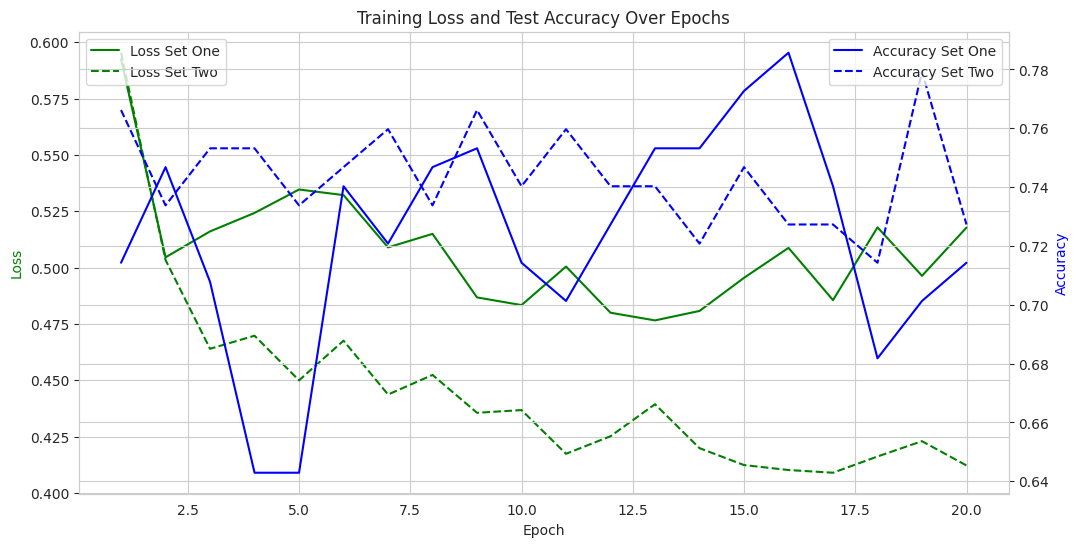

In [ ]:
import matplotlib.pyplot as plt

# Data for Set One
epochs = list(range(1, 21))
loss_set_one = [0.5925, 0.5046, 0.5161, 0.5243, 0.5347, 0.5322, 0.5090, 0.5150, 0.4868, 0.4834, 0.5005, 0.4800, 0.4766, 0.4808, 0.4955, 0.5088, 0.4856, 0.5179, 0.4964, 0.5178]
accuracy_set_one = [0.7143, 0.7468, 0.7078, 0.6429, 0.6429, 0.7403, 0.7208, 0.7468, 0.7532, 0.7143, 0.7013, 0.7273, 0.7532, 0.7532, 0.7727, 0.7857, 0.7403, 0.6818, 0.7013, 0.7143]

# Data for Set Two
loss_set_two = [0.5954, 0.5034, 0.4640, 0.4698, 0.4500, 0.4676, 0.4437, 0.4524, 0.4356, 0.4368, 0.4174, 0.4252, 0.4394, 0.4199, 0.4124, 0.4102, 0.4090, 0.4162, 0.4230, 0.4122]
accuracy_set_two = [0.7662, 0.7338, 0.7532, 0.7532, 0.7338, 0.7468, 0.7597, 0.7338, 0.7662, 0.7403, 0.7597, 0.7403, 0.7403, 0.7208, 0.7468, 0.7273, 0.7273, 0.7143, 0.7792, 0.7273]

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

ax2 = ax1.twinx()
ax1.plot(epochs, loss_set_one, 'g-', label='Loss Set One')
ax2.plot(epochs, accuracy_set_one, 'b-', label='Accuracy Set One')

ax1.plot(epochs, loss_set_two, 'g--', label='Loss Set Two')
ax2.plot(epochs, accuracy_set_two, 'b--', label='Accuracy Set Two')

ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='g')
ax2.set_ylabel('Accuracy', color='b')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Training Loss and Test Accuracy Over Epochs')
plt.show()


### Insights:
1. Initial Performance: Set Two starts with a higher accuracy (77%) compared to Set One (71%), indicating that the initial model for Set Two performs better.
2. Stability: Set Two exhibits more consistent performance with fewer fluctuations in both loss and accuracy, suggesting it might be more reliable.
3. Learning Curve: Both sets show improvement over epochs, but Set Two demonstrates a smoother and potentially more effective learning curve.

### Business Impact:
Understanding these metrics helps in assessing the effectiveness of different models. A model with lower loss and higher, stable accuracy is more desirable as it indicates better predictive power and reliability. Based on this plot, Set Two appears to be the more effective model, potentially leading to more accurate business predictions and insights.

Note: I need to optimize Transformer model in parameters to improve the performance of the model

### Hyperparameters to Tune:
1. Learning Rate: The learning rate is crucial for convergence. Consider using a learning rate scheduler, such as the Warmup Scheduler, where the learning rate increases linearly during the warmup phase and then decreases according to a specified schedule.

2. Batch Size: Larger batch sizes can stabilize the training but require more memory. Experiment with different batch sizes to find a balance between training speed and model performance.

3. Number of Layers: Transformers have multiple encoder and decoder layers. Increasing the number of layers can improve model capacity but also makes it more prone to overfitting and harder to train. Start with a moderate number and adjust based on performance.

4. Hidden Size (d_model): This is the dimension of the input and output vectors of each layer. Increasing the hidden size can improve model performance but also increases computational requirements.

5. Number of Attention Heads: More attention heads allow the model to focus on different parts of the input sequence simultaneously. However, this also increases the model complexity.

6. Dropout Rate: Dropout is used to prevent overfitting. Adjusting the dropout rate can help in regularizing the model. Typically, values range from 0.1 to 0.3.

7. Optimizer: Common choices include Adam and its variants (e.g., AdamW). Using weight decay with AdamW can also help in regularizing the model.

8. Gradient Clipping: To prevent exploding gradients, apply gradient clipping. This technique involves capping the gradients to a maximum value during training.

# Model Deployment to Public URL
Deploying the top-performing models (Random Forest and Gradient Boosting Machine) using Streamlit:

## Step 1: Install Streamlit
First, ensure you have Streamlit installed. You can install it using pip:

In [ ]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 71.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 122.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.4 MB/s eta 0:00:00


## Step 2: Save the Trained Models
Train the Random Forest and Gradient Boosting Machine models and save them using joblib or pickle.

**Training and Saving the Models:**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import joblib

# Assuming X_train and y_train are your training data
rf_model = RandomForestClassifier()
gbm_model = GradientBoostingClassifier()

rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

# Save the models
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(gbm_model, 'gbm_model.pkl')

['gbm_model.pkl']

In [ ]:
import joblib
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Assume X_train and y_train are your training data
rf_model = RandomForestClassifier()
gbm_model = GradientBoostingClassifier()

# Train the models
rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)

# Save the models to disk
joblib.dump(rf_model, 'rf_model.pkl')
joblib.dump(gbm_model, 'gbm_model.pkl')

print("Models saved successfully.")

Models saved successfully.


## Step 3: Create a Streamlit App
Create a Python script (e.g., app.py) for your Streamlit app.

**Streamlit App Script (app.py):**

In [ ]:
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_curve, roc_auc_score
import os
import urllib.request

# Function to download the file
def download_file(url, dest):
    try:
        urllib.request.urlretrieve(url, dest)
        return True
    except Exception as e:
        st.error(f"Error downloading {url}: {e}")
        return False

# URLs for the model files
rf_model_url = 'https://raw.githubusercontent.com/HowardHNguyen/diabetes/master/rf_model_calibrated.pkl'
gbm_model_url = 'https://raw.githubusercontent.com/HowardHNguyen/diabetes/master/gbm_model_calibrated.pkl'
data_url = 'https://raw.githubusercontent.com/HowardHNguyen/diabetes/master/diabetes_01.csv'

# Local paths for the model files
rf_model_path = 'rf_model_calibrated.pkl'
gbm_model_path = 'gbm_model_calibrated.pkl'
data_path = 'diabetes_01.csv'

# Download the models if not already present
if not os.path.exists(rf_model_path):
    st.info(f"Downloading {rf_model_path}...")
    download_file(rf_model_url, rf_model_path)

if not os.path.exists(gbm_model_path):
    st.info(f"Downloading {gbm_model_path}...")
    download_file(gbm_model_url, gbm_model_path)

# Load the calibrated models
try:
    rf_model_calibrated = joblib.load(rf_model_path)
    gbm_model_calibrated = joblib.load(gbm_model_path)
except Exception as e:
    st.error(f"Error loading models: {e}")

# Load the dataset
if not os.path.exists(data_path):
    download_file(data_url, data_path)

try:
    data = pd.read_csv(data_path)
except Exception as e:
    st.error(f"Error loading data: {e}")

# Handle missing values by replacing them with the mean of the respective columns
if 'data' in locals():
    data.fillna(data.mean(), inplace=True)

# Define the feature columns in the order expected by the models
feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Sidebar for input parameters
st.sidebar.header('Enter your parameters')

def user_input_features():
    Pregnancies = st.sidebar.slider('Pregnancies:', 0, 17, 2)
    Glucose = st.sidebar.slider('Glucose:', 0, 200, 98)
    BloodPressure = st.sidebar.slider('BloodPressure:', 0, 122, 80)
    SkinThickness = st.sidebar.slider('SkinThickness:', 0, 99, 22)
    Insulin = st.sidebar.slider('Insulin:', 0, 846, 80)
    BMI = st.sidebar.slider('BMI:', 10, 68, 28)
    DiabetesPedigreeFunction = st.sidebar.slider('Diabetes Pedigree Function:', 0.0, 2.42, 0.47)
    Age = st.sidebar.slider('Age:', 21, 81, 54)

    data = {
        'Pregnancies': Pregnancies,
        'Glucose': Glucose,
        'BloodPressure': BloodPressure,
        'SkinThickness': SkinThickness,
        'Insulin': Insulin,
        'BMI': BMI,
        'DiabetesPedigreeFunction': DiabetesPedigreeFunction,
        'Age': Age
    }
    features = pd.DataFrame(data, index=[0])
    return features

input_df = user_input_features()

# Ensure input_df columns match the trained model feature columns
input_df = input_df[feature_columns]

# Clean feature names to ensure no hidden characters or spaces
input_df.columns = input_df.columns.str.strip()

# Explicitly set data types to match model expectations
input_df = input_df.astype({
    'Pregnancies': 'int64',
    'Glucose': 'int64',
    'BloodPressure': 'int64',
    'SkinThickness': 'int64',
    'Insulin': 'int64',
    'BMI': 'int64',
    'DiabetesPedigreeFunction': 'float64',
    'Age': 'int64'
})

# Apply the model to make predictions
if st.sidebar.button('PREDICT NOW'):
    try:
        rf_proba_calibrated = rf_model_calibrated.predict_proba(input_df)[:, 1]
        gbm_proba_calibrated = gbm_model_calibrated.predict_proba(input_df)[:, 1]
    except Exception as e:
        st.error(f"Error making predictions: {e}")

    st.write("""
    # Diabetes Prediction App by Howard Nguyen
    This app predicts the probability of diabetes using user inputs.
    """)

    st.subheader('Predictions')
    try:
        st.write(f"- Random Forest model: Your diabetes probability prediction is {rf_proba_calibrated[0]:.2f}")
        st.write(f"- Gradient Boosting Machine model: Your diabetes probability prediction is {gbm_proba_calibrated[0]:.2f}")
    except:
        pass

    # Plot the prediction probability distribution
    st.subheader('Prediction Probability Distribution')
    try:
        fig, ax = plt.subplots()
        bars = ax.bar(['Random Forest', 'Gradient Boosting Machine'], [rf_proba_calibrated[0], gbm_proba_calibrated[0]], color=['blue', 'orange'])
        ax.set_ylim(0, 1)
        ax.set_ylabel('Probability')
        for bar in bars:
            yval = bar.get_height()
            ax.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2f}', va='bottom')  # va: vertical alignment
        st.pyplot(fig)
    except:
        pass

    # Plot feature importances for Random Forest
    st.subheader('Risk Factors / Feature Importances (RF)')
    try:
        rf_base_model = rf_model_calibrated.estimator  # Access the base estimator
        fig, ax = plt.subplots()
        importances = rf_base_model.feature_importances_
        indices = np.argsort(importances)
        ax.barh(range(len(indices)), importances[indices], color='blue', align='center')
        ax.set_yticks(range(len(indices)))
        ax.set_yticklabels([feature_columns[i] for i in indices])
        ax.set_xlabel('Importance')
        st.pyplot(fig)
    except Exception as e:
        st.error(f"Error plotting feature importances: {e}")

    # Plot ROC curve for both models
    st.subheader('Model Performance')
    try:
        fpr_rf, tpr_rf, _ = roc_curve(data['Outcome'], rf_model_calibrated.predict_proba(data[feature_columns])[:, 1])
        fpr_gbm, tpr_gbm, _ = roc_curve(data['Outcome'], gbm_model_calibrated.predict_proba(data[feature_columns])[:, 1])
        fig, ax = plt.subplots()
        ax.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(data["Outcome"], rf_model_calibrated.predict_proba(data[feature_columns])[:, 1]):.2f})')
        ax.plot(fpr_gbm, tpr_gbm, label=f'Gradient Boosting Machine (AUC = {roc_auc_score(data["Outcome"], gbm_model_calibrated.predict_proba(data[feature_columns])[:, 1]):.2f})')
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('ROC Curve')
        ax.legend(loc='best')
        st.pyplot(fig)
    except Exception as e:
        st.error(f"Error plotting ROC curve: {e}")
else:
    st.write("## Diabetes Disease Prediction App")
    st.write("### Enter your parameters and click Predict to get the results.")


ModuleNotFoundError: No module named 'streamlit'

In [ ]:
import streamlit
import numpy as np
import pandas as pd
import sklearn
import matplotlib
import joblib
import tensorflow as tf

print("streamlit:", streamlit.__version__)
print("numpy:", np.__version__)
print("pandas:", pd.__version__)
print("scikit-learn:", sklearn.__version__)
print("matplotlib:", matplotlib.__version__)
print("joblib:", joblib.__version__)
print("tensorflow:", tf.__version__)

streamlit: 1.35.0
numpy: 1.25.2
pandas: 2.0.3
scikit-learn: 1.2.2
matplotlib: 3.7.1
joblib: 1.4.2
tensorflow: 2.15.0


# Testing section

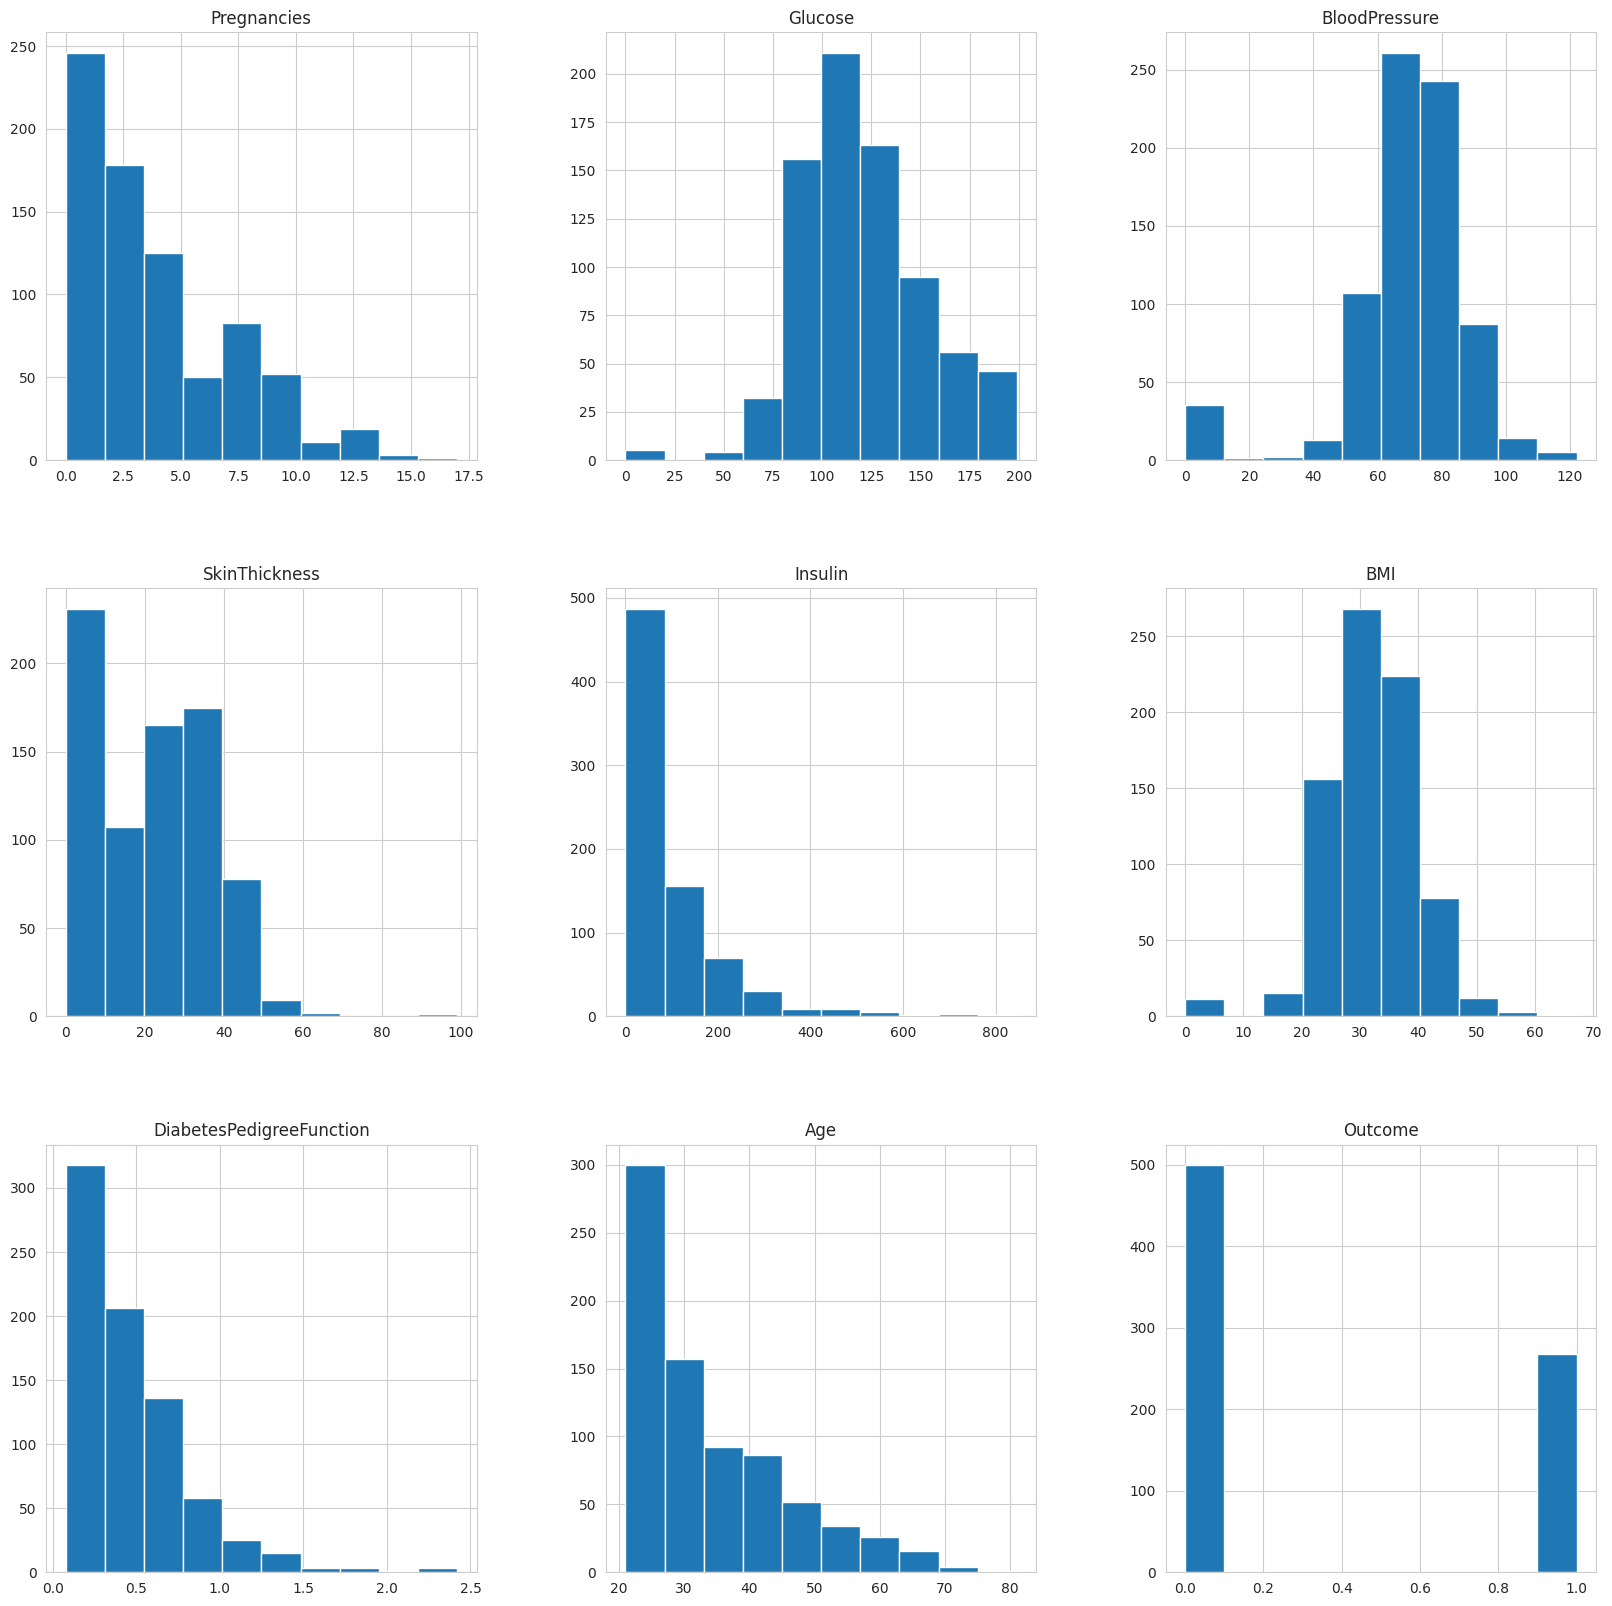

In [ ]:
data.hist(figsize=(20,20))
plt.show()

In [ ]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

**Cross-Validation**

Use Cross-Validation: Employ k-fold cross-validation to ensure the model's robustness and avoid overfitting. This helps in assessing the model's performance more reliably.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr_model, X, y, cv=5, scoring='accuracy')
print(scores.mean())


0.7695696460402341
